# Multiple Linear Regression Model for BoomBikes

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal: 

Need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Meta Information of the Variables:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Data Extraction and Review

In [1]:
#Importing required packages and Modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns',100)

In [2]:
# Importing the Sample dataset
raw=pd.read_csv('day.csv')

In [3]:
# Record Review
raw.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Dimension of the dataset
raw.shape

(730, 16)

- We have observed that this sample dataset provided for analysis has 730 rows and 16 columns

In [5]:
# Information about the Variables
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Identifying Dependant Variable and Independant Variables

The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

- 'Y' Variable = cnt

We are going to use the below independant <b>'X' variables</b> to predict the results of y variable.

- season
- yr 
- mnth
- holiday 
- weekday  
- workingday
- weathersit 
- temp 
- atemp 
- hum 
- windspeed 
- casual 
- registered 
- cnt     

## Data Cleaning and Manipulation

###### Checkpoints:

1. Remove duplicate values if the dataset has any
1. Fix missing values if the datset has any
1. Validate and correct dtype of variables if applicable
1. Remove rows and columns that are insignificant for the analysis
1. Standardisation and Encoding of Variables
1. Filter data if required

#### Step 1 : Duplicate Check

In [6]:
#Removing duplicate Records
raw1=raw.drop_duplicates()

#Checking number of Duplicates
if raw.shape[0] == raw1.shape[0]:  
    print('Observed no duplicates')
else :
    dup=raw.shape[0]-raw1.shape[0]
    print('Observed {} Duplicate Records'.format(dup))

Observed no duplicates


#### Step 2 : Null check

In [7]:
# Checking for Null Values
(raw1.isnull().sum())*100/len(raw1)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<div class=" alert alert-block alert-success">
    
The data has <b> no null values across all the columns</b>, No Data imputation steps required!.
    
</div>

#### Step 3 : Data Type Check

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<div class=" alert alert-block alert-success">
    
We have some categorical variables which were having int as Dtype because of their binary values, this will be converted to categorical by encoding it with categorical label in further steps.
    
</div>

#### Step 4:  Removing variables that are not Significant for the Model and Analysis :

In [9]:
# Insignificant columns
notsignificant=['instant','casual','registered','dteday']
raw2=raw1.drop(notsignificant,axis=1)

In [10]:
print('Columns That were removed: \n')
for col in raw:
    if col not in raw2:
        print('*',  col)
        

Columns That were removed: 

* instant
* dteday
* casual
* registered


<div class=" alert alert-block alert-success">
    
- <b> instant:</b> record index -> Index of a record which will not support any form of analysis to the given problem statement.
- <b> casual & registered : </b> -> Can be removed since the problem statement clearly mentioned us to take total count of users instead of casual or registered users.
- <b> dteday: </b> -> Can be removed since the sample dataset already has the required derived metrics for the analysis from this variables (yr,weekday,mnth).
    
</div>



In [11]:
raw2.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

#### Step 5: Encoding of Variables Derived Metrics - Creating Categorical Fields for the Analysis:

<div class="alert alert-block alert-success">
We have modified the data type of categorical variables by encoding them with labels from data dictionary, that were represented as numeric variables.
   
</div>

##### weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
##### season: 
- 1:spring
- 2:summer
- 3:fall
- 4:winter

##### yr :
- 0: 2018
- 1: 2019

##### holiday:
- 1: Yes
- 0: No

##### workingday:
- 1: Yes
- 0: No

##### Weekday:
- 0: sunday
- 1: monday
- 2: tuesday
- 3: wednesday
- 4: thursday
- 5: friday
- 6: saturday

##### Mnth:

- 1: Jan
- 2: Feb
- 3: mar
- 4: apr
- 5: may
- 6: jun
- 7: jul
- 8: aug
- 9: sep
- 10: oct
- 11: nov
- 12: dec


In [12]:
raw2['season']=raw2[['season']].apply(lambda x: x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

#Converting Weather in to a Categorical Variable
raw2['weathersit']=raw2[['weathersit']].apply(lambda x: 
                                                   x.map({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'}))
#Converting all the periodic values in to categorical variables
raw2['yr']=raw2[['yr']].apply(lambda x: x.map({0:2018,1:2019}))
raw2['holiday']=raw2[['holiday']].apply(lambda x: x.map({1:'yes',0:'no'}))
raw2['workingday']=raw2[['workingday']].apply(lambda x: x.map({1:'yes',0:'no'}))
raw2['weekday']=raw2[['weekday']].apply(lambda x: x.map({0:'sunday',1:'monday',2:'tuesday',
                                                         3:'wednesday',4:'thursday',5:'friday',6:'saturday'}))
raw2['mnth']=raw2[['mnth']].apply(lambda x: x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                  ,9:'sep',10:'oct',11:'nov',12:'dec'}))
raw2['yr']=raw2['yr'].astype('object')# Converting the Data type of year variable


In [13]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 74.1+ KB


#### Step 6: Insignificant value analysis on variables

Checking value counts of variables to identify the value distibution and miscelleaneous values.

In [14]:
for col in raw2:
    if (raw2[col].dtype =='object'):
        print(col, ': \n')
        print(raw2[col].value_counts(),'\n')

season : 

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

yr : 

2018    365
2019    365
Name: yr, dtype: int64 

mnth : 

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64 

holiday : 

no     709
yes     21
Name: holiday, dtype: int64 

weekday : 

saturday     105
sunday       105
monday       105
tuesday      104
thursday     104
friday       104
wednesday    103
Name: weekday, dtype: int64 

workingday : 

yes    499
no     231
Name: workingday, dtype: int64 

weathersit : 

clear         463
mist          246
light_rain     21
Name: weathersit, dtype: int64 



<div class="alert alert-block alert-success">

No miscellaneous or junk values identified in any of the listed variables.

</div>

In [15]:
print('*  Total Variables After cleanup: {}'.format(len([col for col in raw2])))
print('*  Total Continuos numeric Variables: {}'.format(len([col for col in raw2 if raw2[col].dtype=='float64'])))
print('*  Total Categorical Variables: {}'.format(len([col for col in raw2 if raw2[col].dtype=='object'])))
print('*  Total Numeric int Variables: {}'.format(len([col for col in raw2 if raw2[col].dtype=='int64'])))

*  Total Variables After cleanup: 12
*  Total Continuos numeric Variables: 4
*  Total Categorical Variables: 7
*  Total Numeric int Variables: 1


## Data Analysis - Variable Exploration

1. Basic stastics about the Numeric variables
1. Distribution Analysis
1. Outlier Identification and Treatment

#### Step1 : Statistics check

In [16]:
raw2.describe()

temp       atemp         hum   windspeed          cnt
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000

In [17]:
for col in raw2:
    if (raw2[col].dtype !='object') and (raw2[col].median()-raw2[col].mean())*100/raw2[col].median() < 5:
        print(col)

temp
atemp
hum
windspeed
cnt


<div class="alert alert-block alert-success">

All the continuous numeric variables were normally distributed.

</div>

#### Step2: Distribution Analysis of Variables  

In [18]:
cat_var=[]
print('Categorical Variables for Analysis : \n')
for col in raw2:
    if raw2[col].dtype=='object':
        cat_var.append(col)
        print('*', col)

        
print('\nIn total we have {} Categorical Variables for the Analysis. \n'.format(len(cat_var)))

Categorical Variables for Analysis : 

* season
* yr
* mnth
* holiday
* weekday
* workingday
* weathersit

In total we have 7 Categorical Variables for the Analysis. 



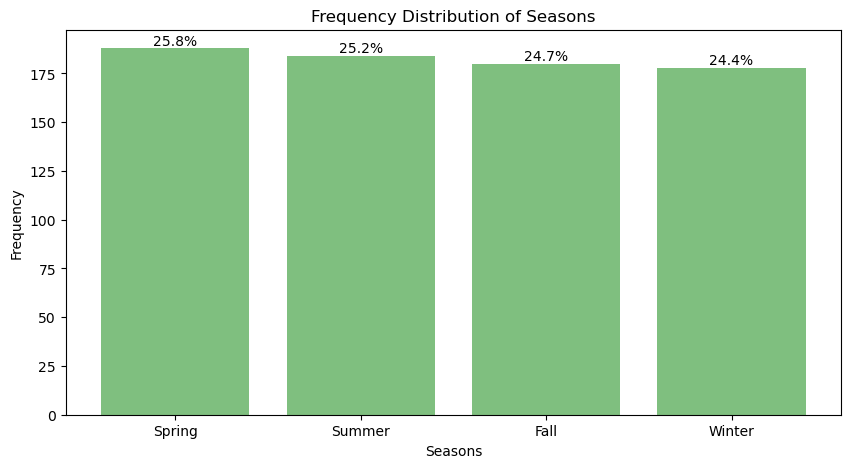

In [19]:
plt.figure(figsize=(10,5))

# Count the frequency of each season category
season_counts = raw2['season'].value_counts()

season_percentages = (season_counts / season_counts.sum()) * 100

# Create a bar chart
plt.bar(season_counts.index, season_counts.values,color='green', alpha=0.5)
# Label each bar with its corresponding season category
plt.xticks(season_counts.index, ['Spring', 'Summer', 'Fall', 'Winter'])

# Label each bar with its corresponding season category and percentage value
for i, count in enumerate(season_counts.values):
    plt.text(i, count, f'{season_percentages[i]:.1f}%', ha='center', va='bottom')


plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Seasons')
plt.show()

#### Observations:

<div class="alert alert-block alert-success">
    
Across the year spring and summer is the most occured seasons with the below percentage of distributions

- 25.8%
- 25.2%

All the seasons seems to have almost similar trend in distribution. Season could be a Good feature for the model.
    
</div>

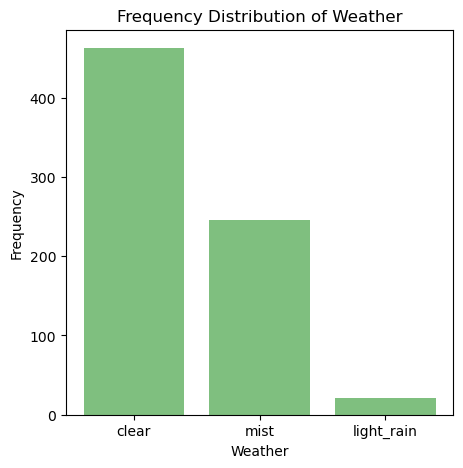

In [20]:
plt.figure(figsize=(5,5))


# Count the frequency of each season category
weather_counts = raw2['weathersit'].value_counts()

weather_percentages = (weather_counts / weather_counts.sum()) * 100

# Create a bar chart
plt.bar(weather_counts.index, weather_counts.values,color='green',alpha=0.5)

# Label each bar with its corresponding season category
#plt.xticks(season_counts.index, ['Spring', 'Summer', 'Fall', 'Winter'])

plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Weather')
plt.show()

#### Observations :

<div class="alert alert-block alert-success">

- Across the years most of the times there seems to be clear weather with the overalall weather distribution in the data Clear weather seems to have 63.4% of distribution
- 33.7% mist distribution states that there some moderate chances of having misty weather across the years
- we don't have much distributions for data havingh light rain which sates that this season might not have considerable data for analysis the bike registrations
    </div>

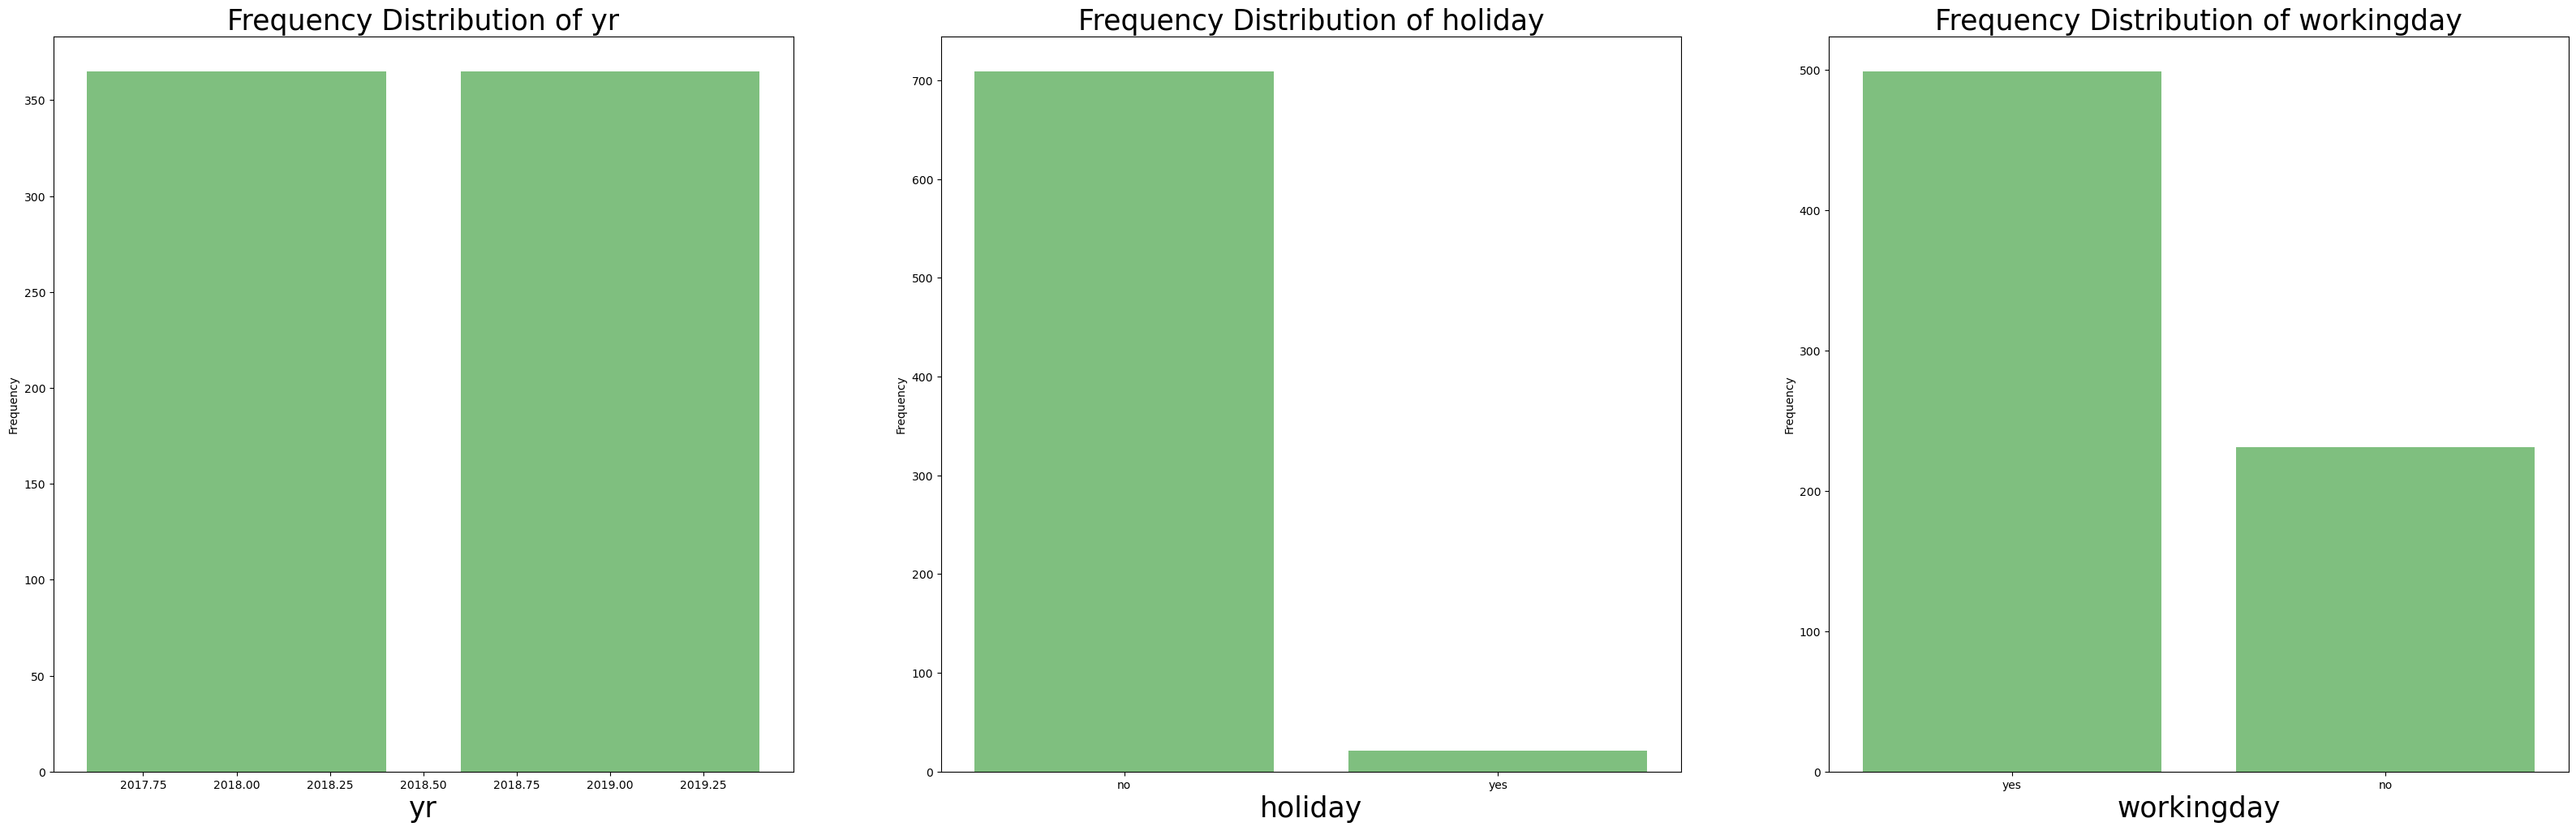

In [21]:
i=1
k=1
plt.figure(figsize=(40,40))
for col in raw2:
    if (raw2[col].dtype=='object') & (raw2[col].nunique()==2):
        df_c=raw2[col].value_counts()
        df_per=(df_c/df_c.sum()) * 100
        plt.subplot(3,3,i)
        plt.bar(df_c.index,df_c.values,color='green', alpha=0.5)
        plt.xlabel(col,fontsize=25)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of {}'.format(col), fontsize=25)
        # Label each bar with its corresponding season category and percentage value
       

        i=i+1
plt.show()



#### Observations:

<div class="alert alert-block alert-success">
    
- <b> Yr: </b> both 2018 and 2019 has quite similar data distributions this might be a good feature that can be used for the model based on the data distribution .  
- <b> Holiday & workingday: </b> distribution of holiday is lesser than working days in the given dataset.there might be a chance that this variable could not be a good feature for the model.
    
</div>

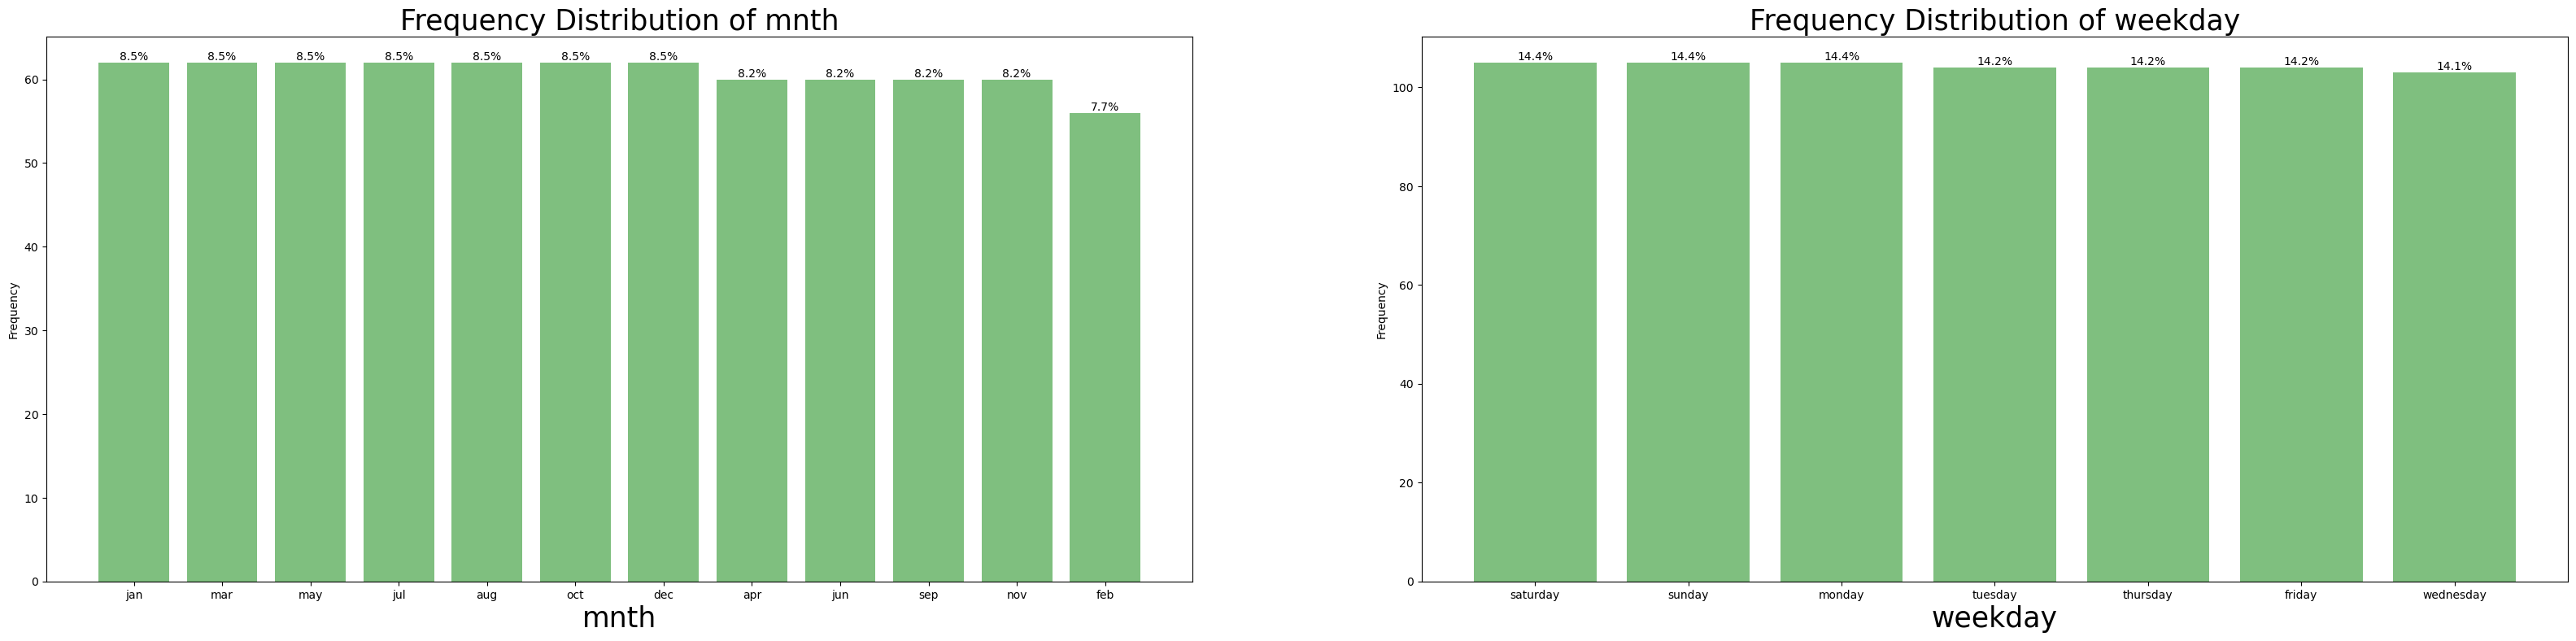

In [22]:
i=1
j=1
plt.figure(figsize=(40,40))
for col in raw2:
    if (raw2[col].dtype=='object') & (raw2[col].nunique()>4):
        df_c=raw2[col].value_counts()
        df_per=(df_c/df_c.sum()) * 100
        plt.subplot(4,2,i)
        plt.bar(df_c.index,df_c.values,color='green', alpha=0.5)
        plt.xlabel(col,fontsize=25)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Frequency Distribution of {}'.format(col), fontsize=25)
        # Label each bar with its corresponding season category and percentage value
        for j, count in enumerate(df_c.values):
             plt.text(j, count, f'{df_per[j]:.1f}%', ha='center', va='bottom')

        i=i+1
plt.show()



#### Observations:

<div class="alert alert-block alert-success">
    
- <b> mnth: </b> The frequency distribution of month is constant across most of the months except apr, jun,sep,nov,feb where the distibution seems to be a bit lower.  
- <b> Weekday: </b> Data is distributed consistenly cross all the weekdays.       
    
Both these variables were having enough data for the analysis we will explore further about their significance in the univariate analysis part.
</div>

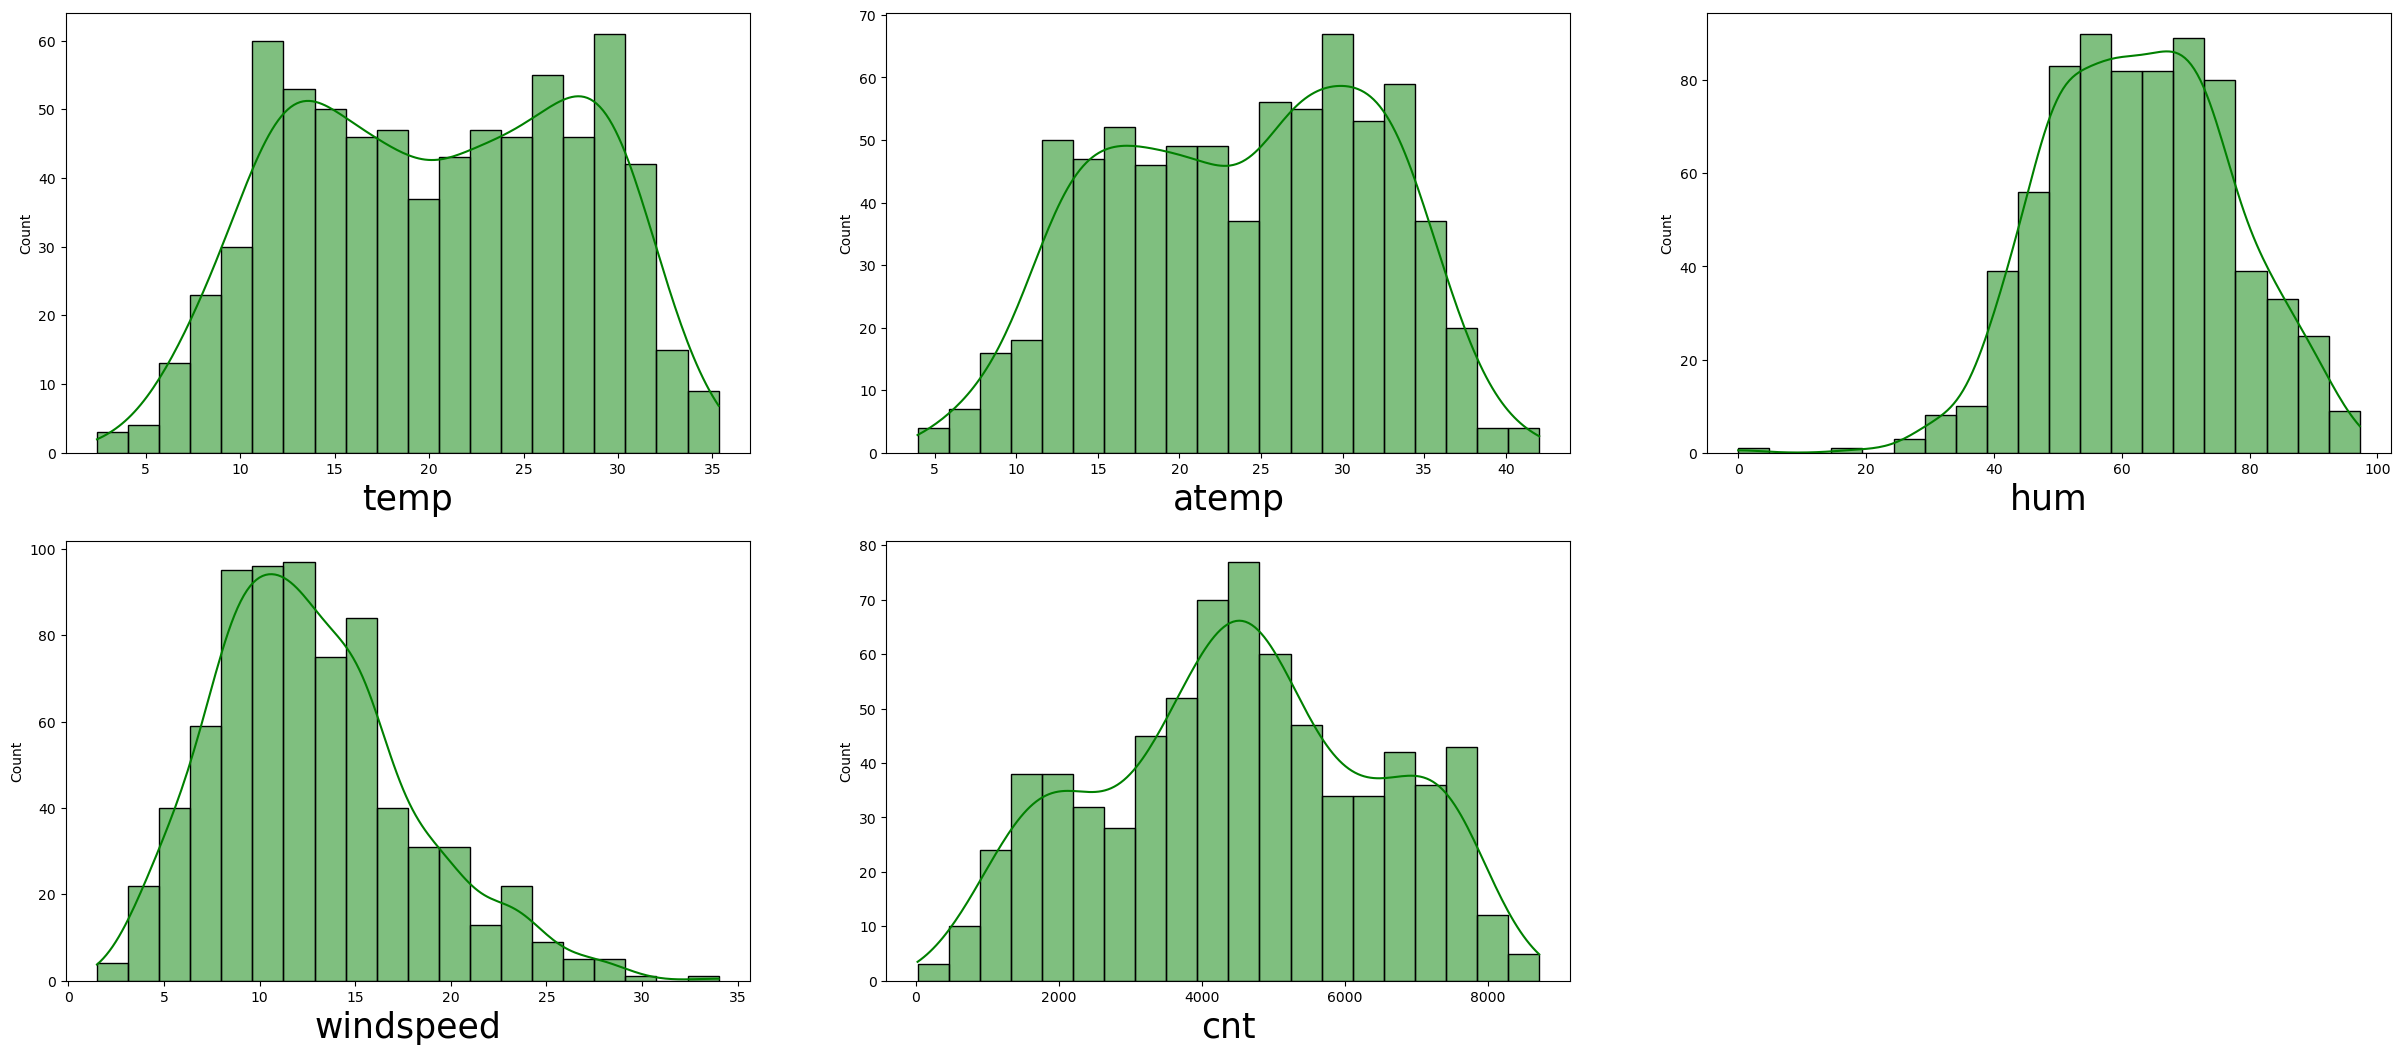

In [23]:
num_ex1=['yr','holiday','workingday','year','weekday','mnth']
i=1

plt.figure(figsize=(30,40))
for col in raw2:
    if (raw2[col].dtype!='object') & (col not in num_ex1):
        plt.subplot(6,3,i)
        sns.histplot(raw2[col],kde=True,color='green',bins=20)
        plt.xlabel(col,fontsize=25)
        i=i+1
plt.show()

<div class= 'alert alert-block alert-success'>
    
- Temaparature seems to have a higher distribution between 10-12 degree celsious & 30 degree celsious
- feeling temparature seems to have a higher distribution for 30 degree celsious 
- <b>By looking into temparature and feeling temparature we can say 30 degree celcious is the most occuring       tempartaure over all the years</b>    
- windspeed has its values mostly distributed between 7-11
- 50 and 70 is the highest distributed humidty values
- The variable count seems close to a normal distibution where most of the data distribution is on '5000'

<b> All the continuos numerical variables have values which almost have a normal distribution</b>

</div>

#### Step 3: Outlier Identification and Treatment

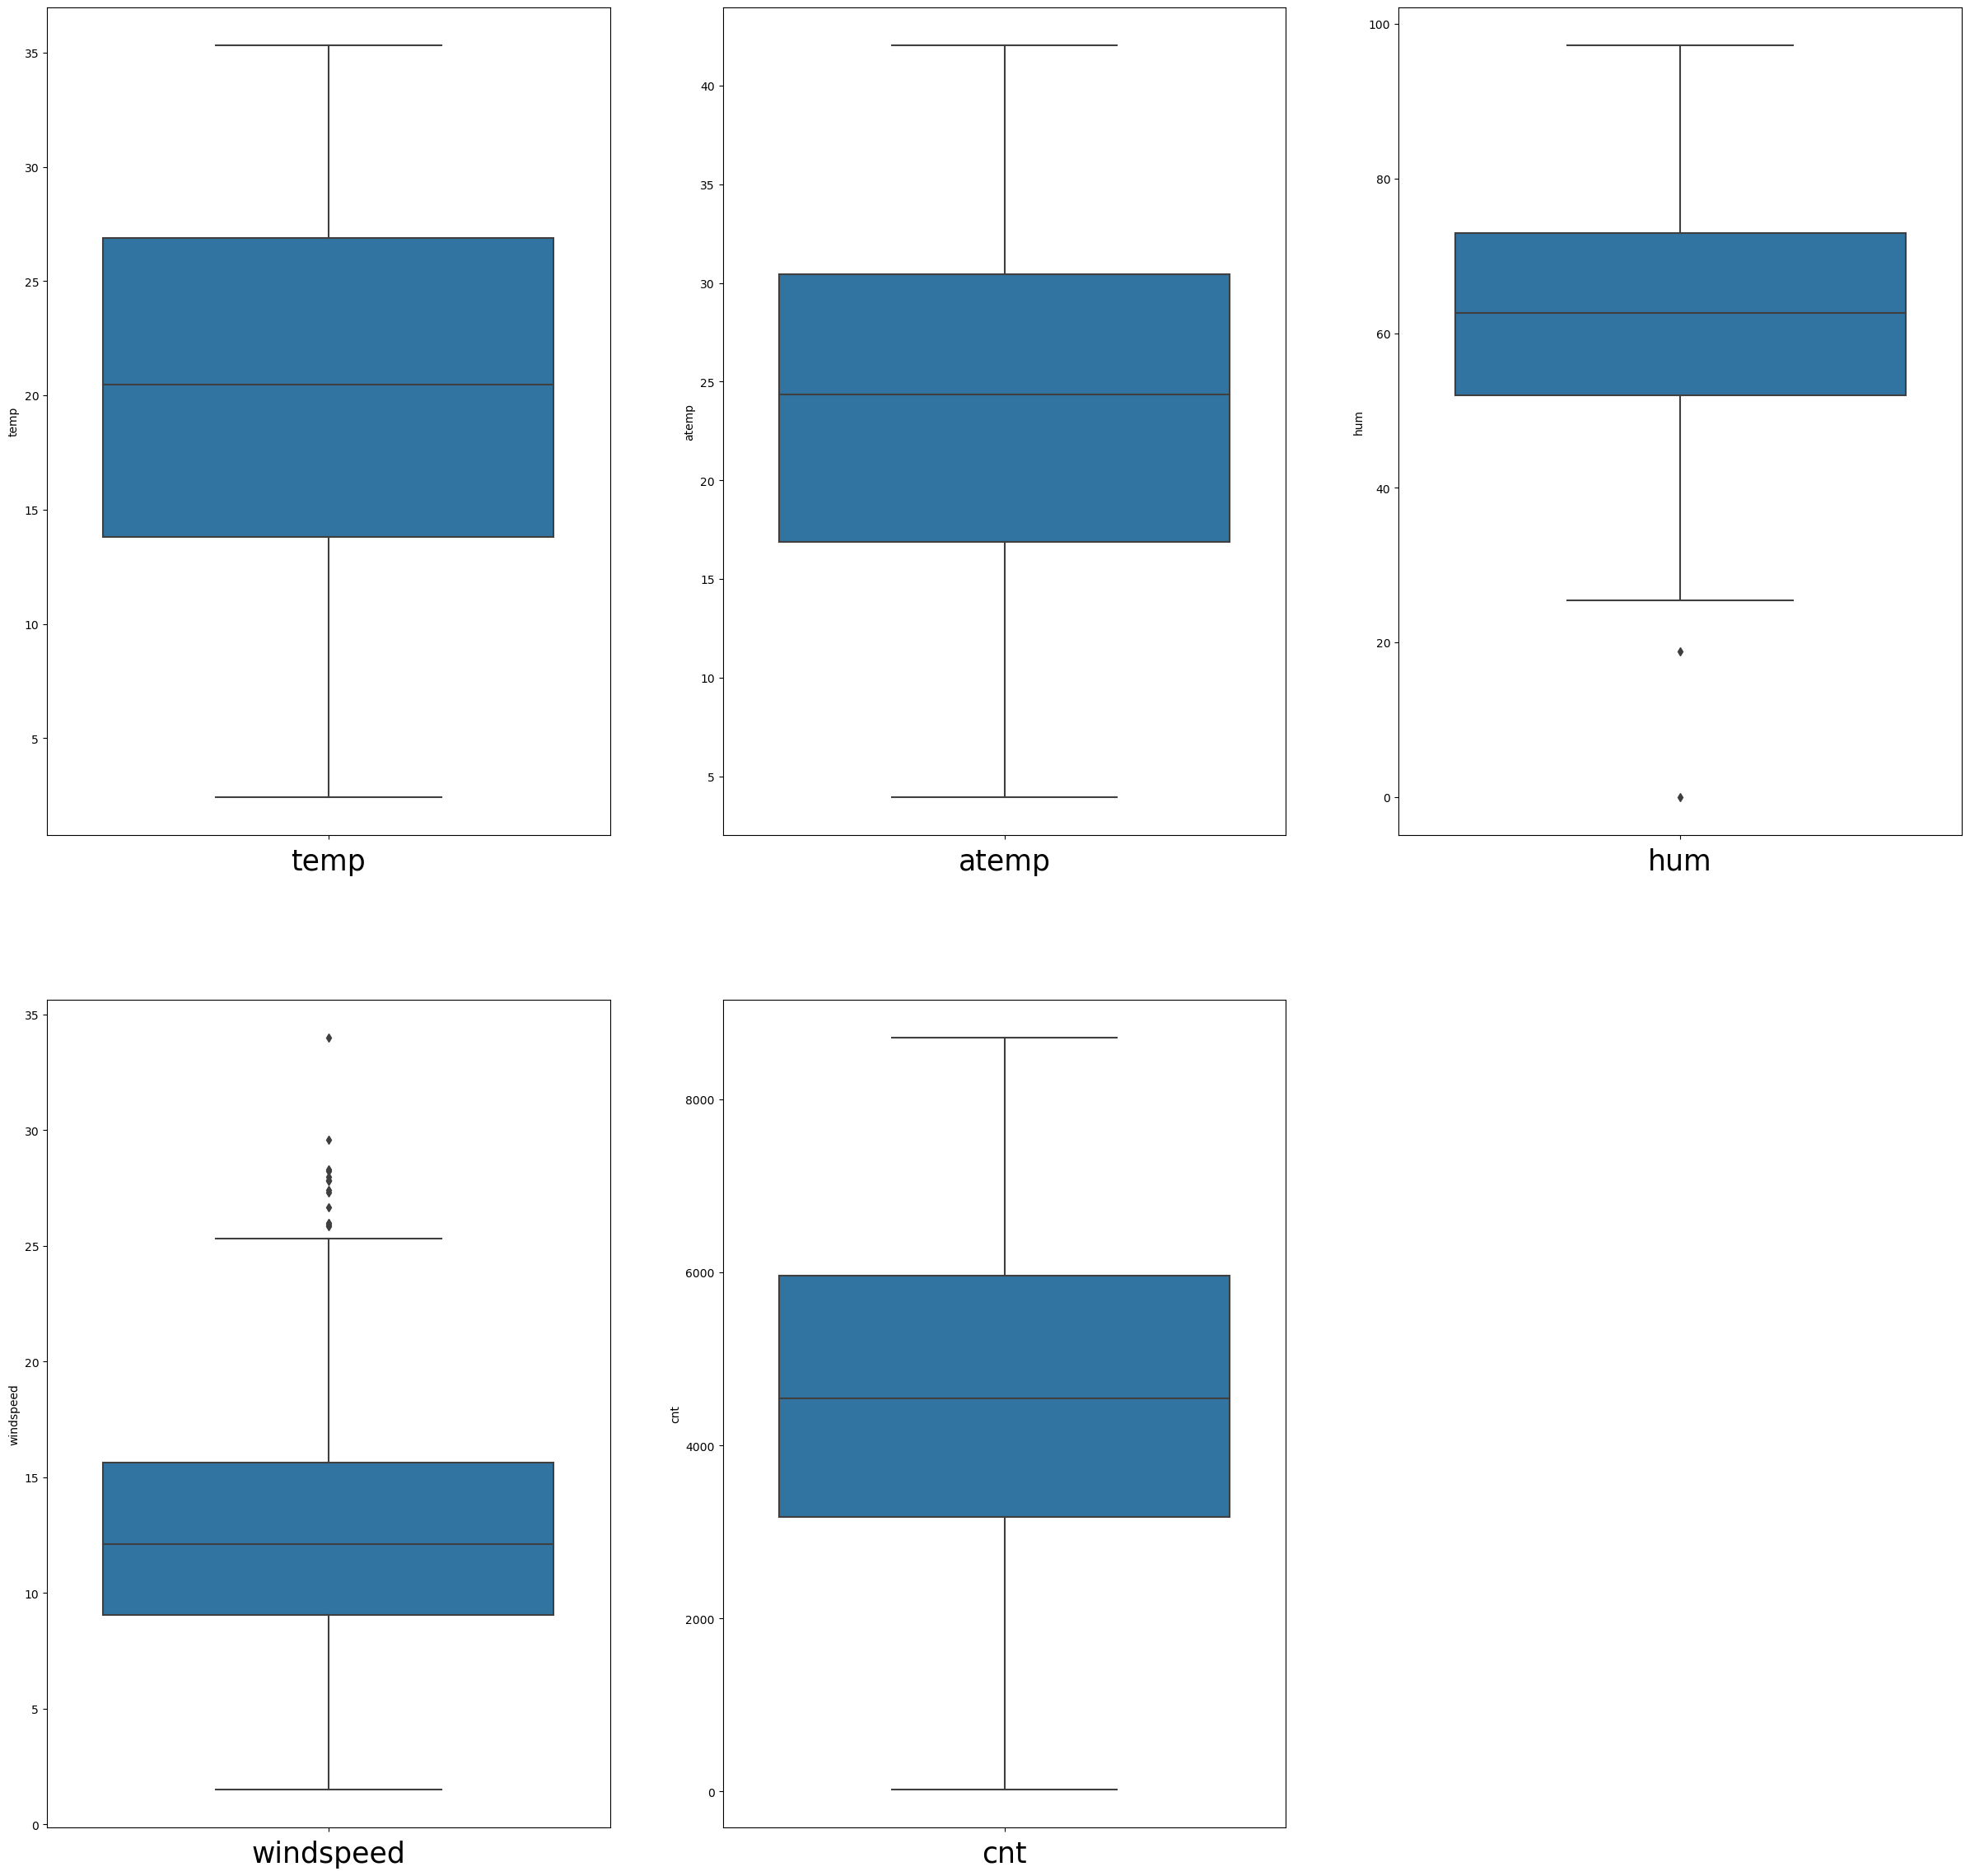

In [24]:
import math
axis=1
rows=math.ceil(raw2.shape[1]/3)
rows
plt.figure(figsize=(30,60))
i=1

for col in raw2:
    if (raw2[col].dtype =='int64') | (raw2[col].dtype =='float64'):
        plt.subplot(rows,3,i)
        sns.boxplot(y=raw2[col])
        plt.xlabel(col,fontsize=25)
        i=i+1        
plt.show()

#### Observations : 


<div class="alert alert-block alert-success">
    
- Windspeed and hum seems to have some outliers, this can be fixed using max and min capping
- Remaining variable seems to have no potential outliers as per the analysis from the boxplot.
</div>

#### Fixing Outliers

In [25]:
def upper_lower_bound(data,col):
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    # Calculate 1.5 times the IQR
    threshold = 1.5 * IQR
    # Determine the lower bound and upper bound
    lower_bound = Q1 - threshold
    upper_bound = Q3 + threshold
    data[col]= np.where(data[col].values > upper_bound, upper_bound, np.where(data[col].values < lower_bound,lower_bound,data[col]))



In [26]:
upper_lower_bound(raw2,'windspeed')
upper_lower_bound(raw2,'hum')

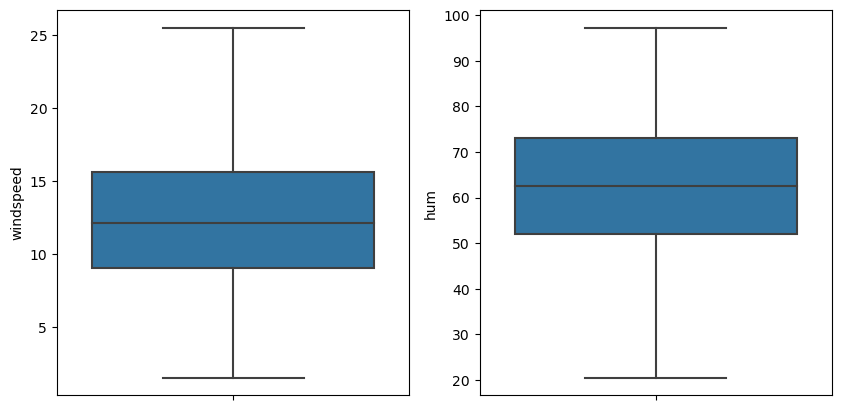

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(y=raw2['windspeed'])
plt.subplot(1,2,2)
sns.boxplot(y=raw2['hum'])
plt.show()

<div class="alert alert-block alert-success">
    From the above boxplot we can now conclude that windspeed and hum have potential outliers.
</div>

***

## Univariate Analysis of Variables:

In [28]:
from tabulate import tabulate

def stat_chart(col):
        bi_var = raw2.groupby(col)['cnt'].agg(['sum', 'median','count']).sort_values('sum',ascending = False)
        bi_var['%sum']=bi_var['sum']/raw2.cnt.sum()*100
        table = tabulate(round(bi_var,2), headers='keys', tablefmt='grid')
        print('\n Statistics for {} :\n'.format(col))
        print(table,'\n ')
        
        print('Visualization for {} :'.format(col),'\n')

        if raw2[col].nunique()>5:
            plt.figure(figsize=(20,4))
        else:
            plt.figure(figsize=(20,4))
        plt.subplot(1,2,1)    
        ax=sns.barplot(x=col,y='cnt', data=raw2)
        for patch in ax.patches:
            patch.set_edgecolor('black')
        plt.subplot(1,2,2) 
        ax1=sns.boxplot(x=col,y='cnt', data=raw2)
        for patch in ax1.patches:
            patch.set_edgecolor('black')
        plt.show()
        


 Statistics for season :

+----------+------------------+----------+---------+--------+
| season   |              sum |   median |   count |   %sum |
+==========+==================+==========+=========+========+
| fall     |      1.06113e+06 |   5353.5 |     188 |  32.24 |
+----------+------------------+----------+---------+--------+
| summer   | 918589           |   4941.5 |     184 |  27.91 |
+----------+------------------+----------+---------+--------+
| winter   | 841613           |   4634.5 |     178 |  25.57 |
+----------+------------------+----------+---------+--------+
| spring   | 469514           |   2222.5 |     180 |  14.27 |
+----------+------------------+----------+---------+--------+ 
 
Visualization for season : 



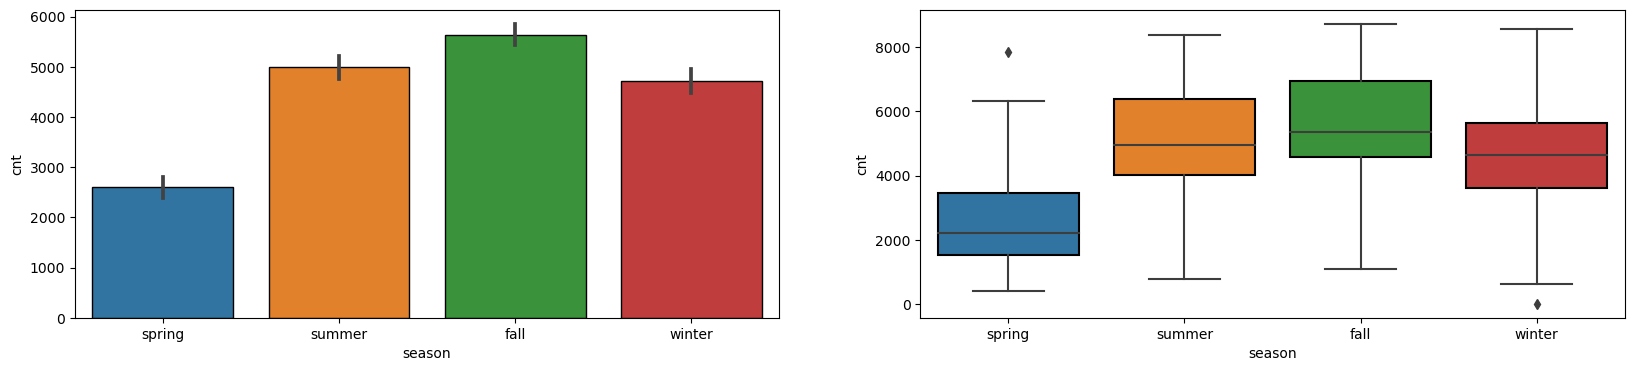

In [29]:
stat_chart('season')

#### Observation:

<div class='alert alert-block alert-success'>

- Overall the highest the bike booking were happening in the Fall season which is <b>32%</b> of total booking of (2018 & 2019) with a <b>median > 5K bookings</b>
- The remaining bookings were happening in the Summer & Winter season with <b>27% & 25% </b> of total booking with a <b>median arround 5K</b>. 
- The remains of the total booking is <b>14%</b> which is booked during the spring season with a <b>median arround 2.2k. <b/>
    

★ Season shows some linear relationship with total booking hence it can be a good predictor variable for the model.
    
    
</div>




 Statistics for mnth :

+--------+--------+----------+---------+--------+
| mnth   |    sum |   median |   count |   %sum |
+========+========+==========+=========+========+
| aug    | 351194 |   5229.5 |      62 |  10.67 |
+--------+--------+----------+---------+--------+
| jun    | 346342 |   5308.5 |      60 |  10.52 |
+--------+--------+----------+---------+--------+
| sep    | 345991 |   5384   |      60 |  10.51 |
+--------+--------+----------+---------+--------+
| jul    | 344948 |   5446.5 |      62 |  10.48 |
+--------+--------+----------+---------+--------+
| may    | 331686 |   4890.5 |      62 |  10.08 |
+--------+--------+----------+---------+--------+
| oct    | 322352 |   5013   |      62 |   9.8  |
+--------+--------+----------+---------+--------+
| apr    | 269094 |   4293.5 |      60 |   8.18 |
+--------+--------+----------+---------+--------+
| nov    | 254831 |   4081   |      60 |   7.74 |
+--------+--------+----------+---------+--------+
| mar    | 228920 |   321

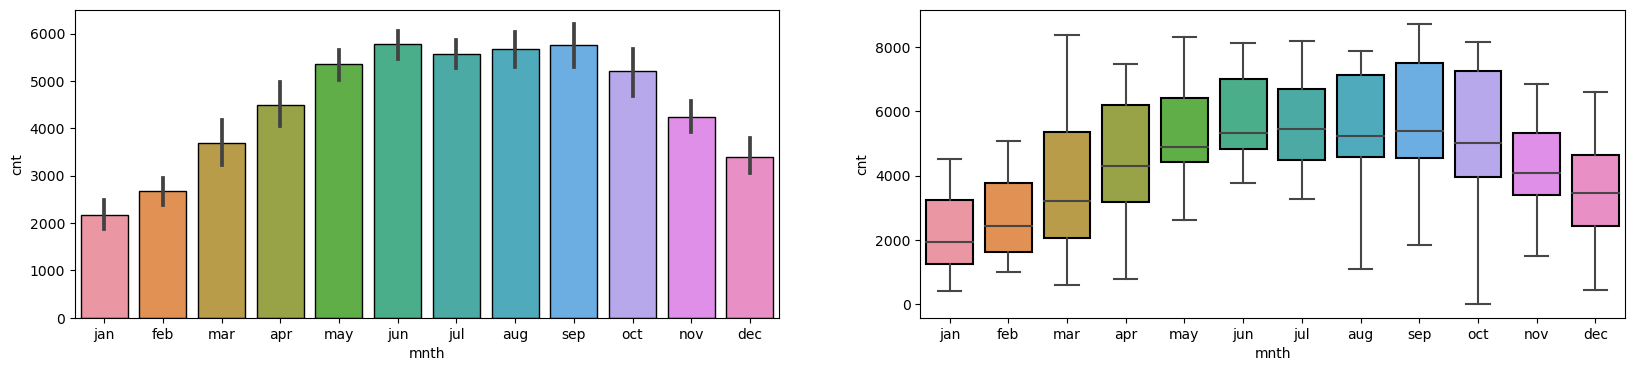

In [30]:
stat_chart('mnth')

#### Observation:

<div class='alert alert-block alert-success'>

-  We have a consistent <b>(10%)</b> rental bookings per month, between <b>May to Sep </b> with a <b>median > 5k </b>bookings per month <b>except may month which has a median arround 5k</b>. 

★  mnth shows some linear relationship with total booking hence it can be a good predictor variable for the model.
    
</div>




 Statistics for holiday :

+-----------+-----------------+----------+---------+--------+
| holiday   |             sum |   median |   count |   %sum |
+===========+=================+==========+=========+========+
| no        |     3.21241e+06 |     4563 |     709 |  97.62 |
+-----------+-----------------+----------+---------+--------+
| yes       | 78435           |     3351 |      21 |   2.38 |
+-----------+-----------------+----------+---------+--------+ 
 
Visualization for holiday : 



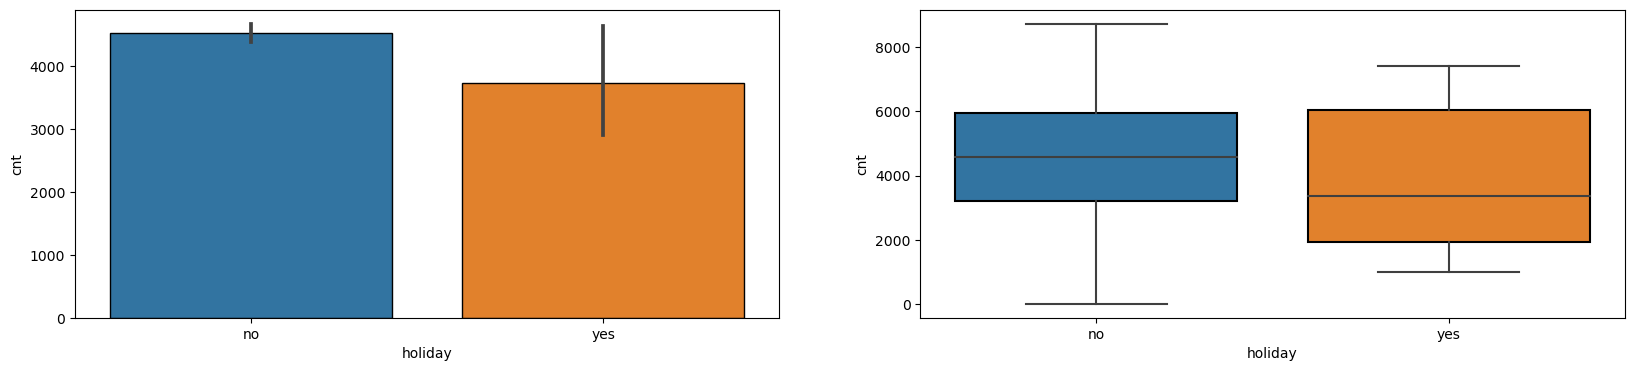

In [31]:
stat_chart('holiday')

#### Observations:
<div class='alert alert-block alert-success'>
    
- <b>97%</b> of total bike bookings are happeing in <b>non-holiday's</b> with a median of arround <b>4.5K</b>.
    
    
</div>


 Statistics for weekday :

+-----------+--------+----------+---------+--------+
| weekday   |    sum |   median |   count |   %sum |
+===========+========+==========+=========+========+
| friday    | 487790 |   4601.5 |     104 |  14.82 |
+-----------+--------+----------+---------+--------+
| thursday  | 485395 |   4721   |     104 |  14.75 |
+-----------+--------+----------+---------+--------+
| saturday  | 477807 |   4521   |     105 |  14.52 |
+-----------+--------+----------+---------+--------+
| wednesday | 471214 |   4656   |     103 |  14.32 |
+-----------+--------+----------+---------+--------+
| tuesday   | 469109 |   4576.5 |     104 |  14.25 |
+-----------+--------+----------+---------+--------+
| monday    | 455503 |   4359   |     105 |  13.84 |
+-----------+--------+----------+---------+--------+
| sunday    | 444027 |   4334   |     105 |  13.49 |
+-----------+--------+----------+---------+--------+ 
 
Visualization for weekday : 



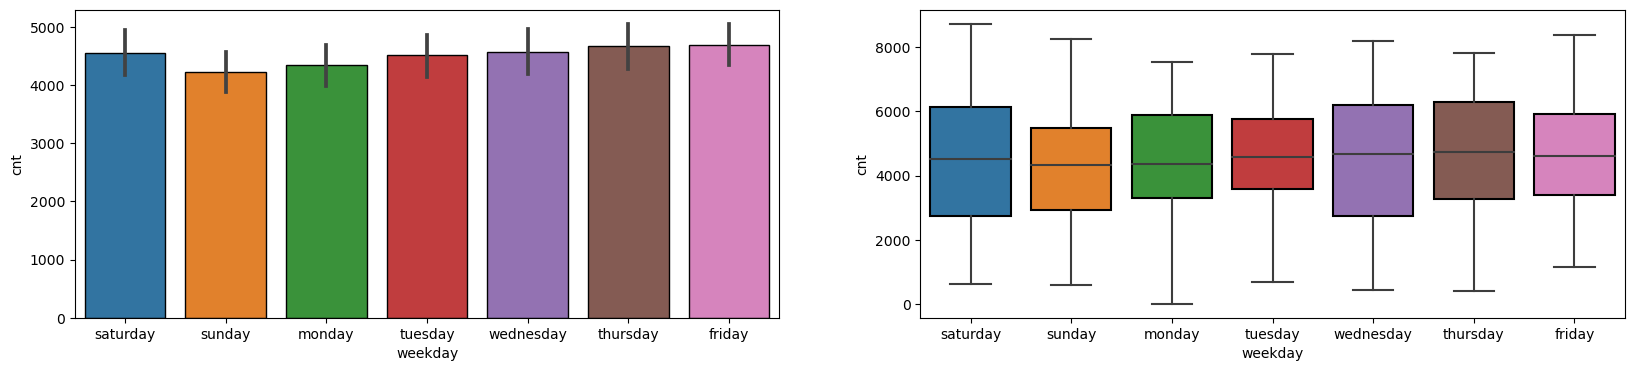

In [32]:
stat_chart('weekday')

#### Observation:

<div class='alert alert-block alert-success'>

-  We have rental bookings > <b>(14%)</b> per day, from <b>tuesday to friday </b> with a <b>median > 4.5k </b>bookings per day.
- On monday and saturday we have arround <b>13%</b> of total bookings with a media close to <b>4.4K</b>
    
</div>


 Statistics for workingday :

+--------------+-------------+----------+---------+--------+
| workingday   |         sum |   median |   count |   %sum |
+==============+=============+==========+=========+========+
| yes          | 2.29058e+06 |     4585 |     499 |   69.6 |
+--------------+-------------+----------+---------+--------+
| no           | 1.00027e+06 |     4459 |     231 |   30.4 |
+--------------+-------------+----------+---------+--------+ 
 
Visualization for workingday : 



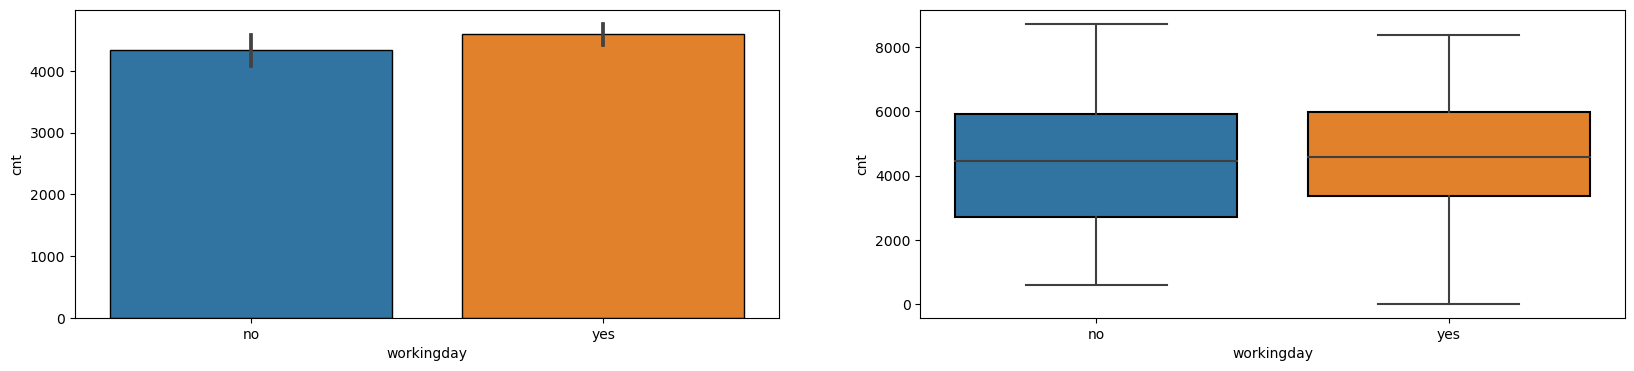

In [33]:
stat_chart('workingday')

#### Observation:

<div class='alert alert-block alert-success'>

- Almost 70% of the total bookings were happening in working days with a median of 4.5k.
    
</div>


 Statistics for weathersit :

+--------------+------------------+----------+---------+--------+
| weathersit   |              sum |   median |   count |   %sum |
+==============+==================+==========+=========+========+
| clear        |      2.25795e+06 |     4844 |     463 |  68.61 |
+--------------+------------------+----------+---------+--------+
| mist         | 995024           |     4043 |     246 |  30.24 |
+--------------+------------------+----------+---------+--------+
| light_rain   |  37869           |     1817 |      21 |   1.15 |
+--------------+------------------+----------+---------+--------+ 
 
Visualization for weathersit : 



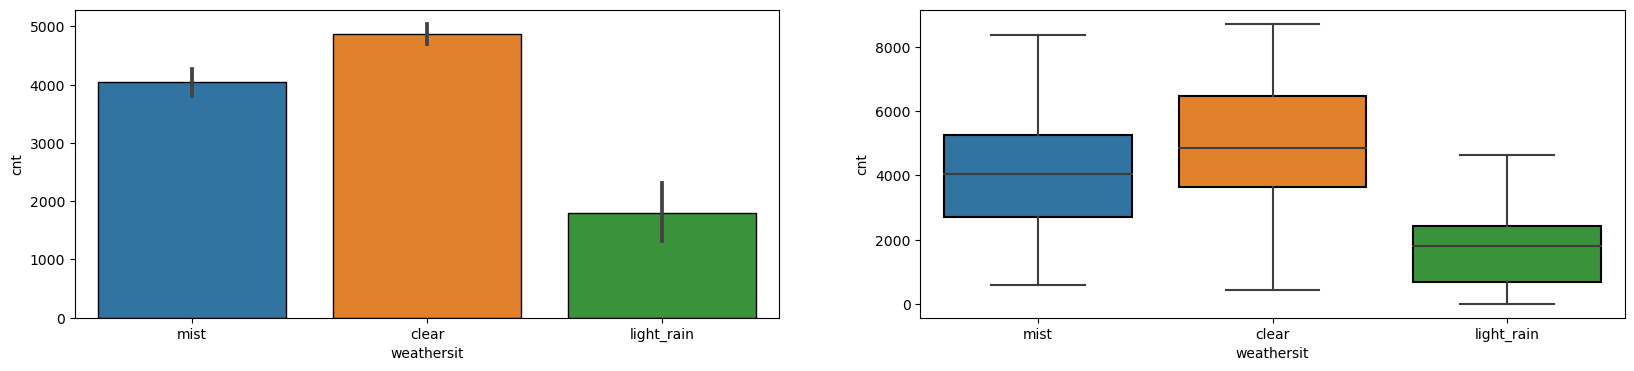

In [34]:
stat_chart('weathersit')

#### Observation:

<div class='alert alert-block alert-success'>

-  68% of the Total bookings were happening during Clear sky with a median arround 4.8K.
- 30% of the Total bookings were happening during misty weather with a median of 4k.
- only 1.1% of bikes were booked during light rains.

★  Weathersit shows some linear relationship with total booking hence it can be a good predictor variable for the model.

    
</div>


 Statistics for yr :

+------+-------------+----------+---------+--------+
|   yr |         sum |   median |   count |   %sum |
+======+=============+==========+=========+========+
| 2019 | 2.04774e+06 |     5936 |     365 |  62.23 |
+------+-------------+----------+---------+--------+
| 2018 | 1.2431e+06  |     3740 |     365 |  37.77 |
+------+-------------+----------+---------+--------+ 
 
Visualization for yr : 



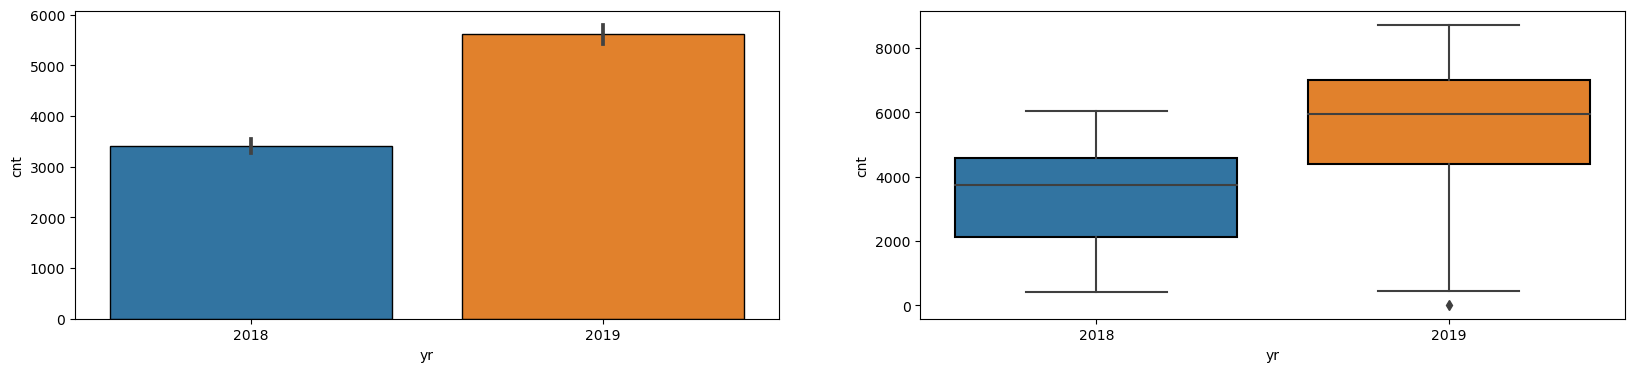

In [35]:
stat_chart('yr')

#### Observation:

<div class='alert alert-block alert-success'>

- 2018 has 38% of the Total bookings with a median of 3740.
- Where 2019 has 62% of the total booking with a median of 5936 it is clear that 2019 shows has an increasing trend (+24%) in booking from the above visulizations.

★  Year could  be a good feature for building the model.
    
</div>

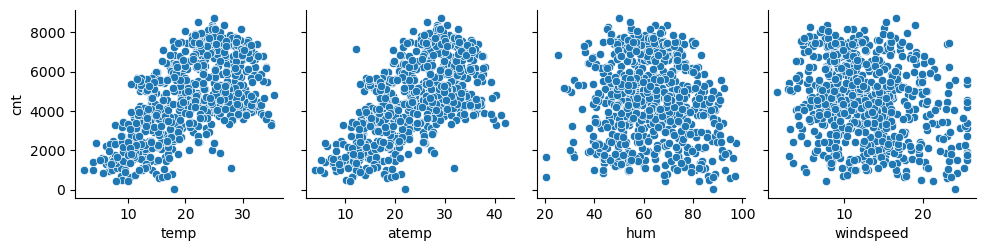

In [36]:
num_col=['temp', 'atemp', 'hum', 'windspeed']

ax = sns.pairplot(x_vars=num_col, y_vars=['cnt'] 
                  , data=raw2, palette='Paired')
plt.show()

#### Observation:

<div class='alert alert-block alert-success'>


- Out of these numeric variable temp and atemp shows a linear relationship with bookings
    

★ temp,atemp shows some linear relationship with total booking hence they can be a good predictor variable for the model.    
    
</div>



## Bi-Variate Analysis

In [37]:
raw2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [38]:

# function to generate plots related to Categorical Variables
def bi_var(col1,col2,num,hue1,hue2,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col1,num,data=raw2, hue=hue1,palette='pastel')
    plt.legend()
    plt.title(col1)
    plt.subplot(1,2,2)
    sns.barplot(col2,num,data=raw2, hue=hue2,palette='pastel')
    plt.legend()
    plt.title(col2)
    return

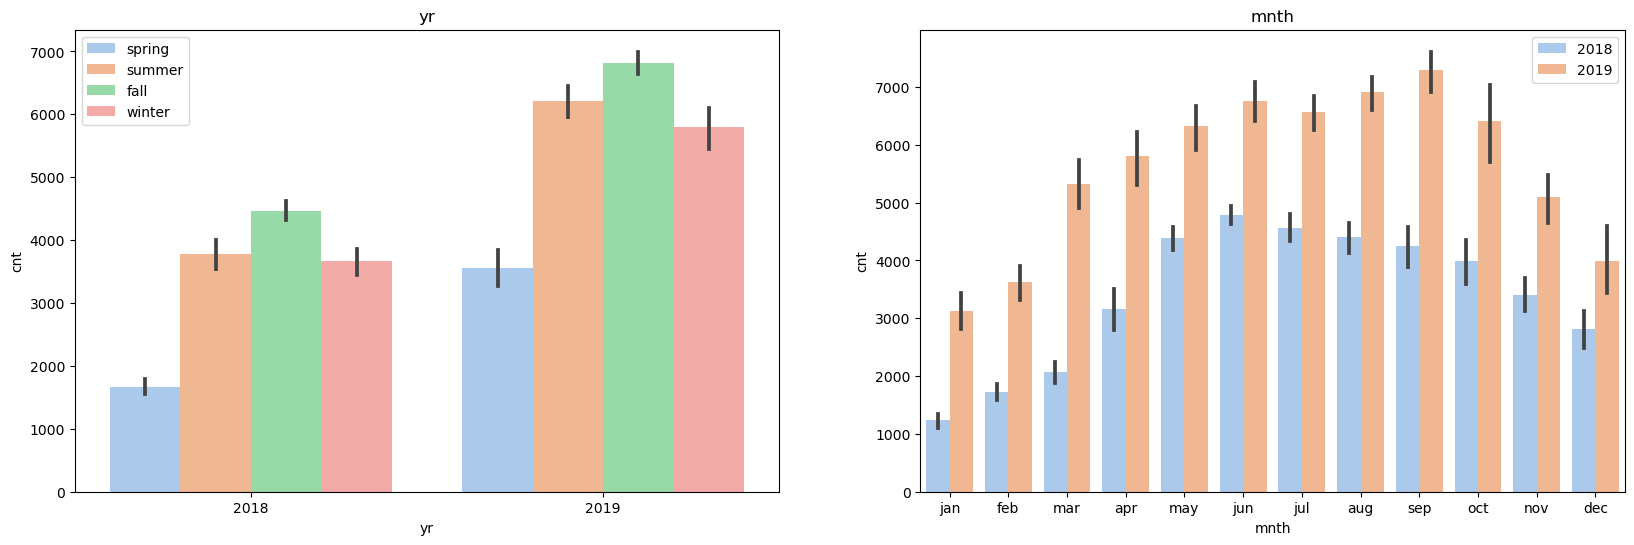

In [39]:
bi_var('yr','mnth','cnt','season','yr',20,6)

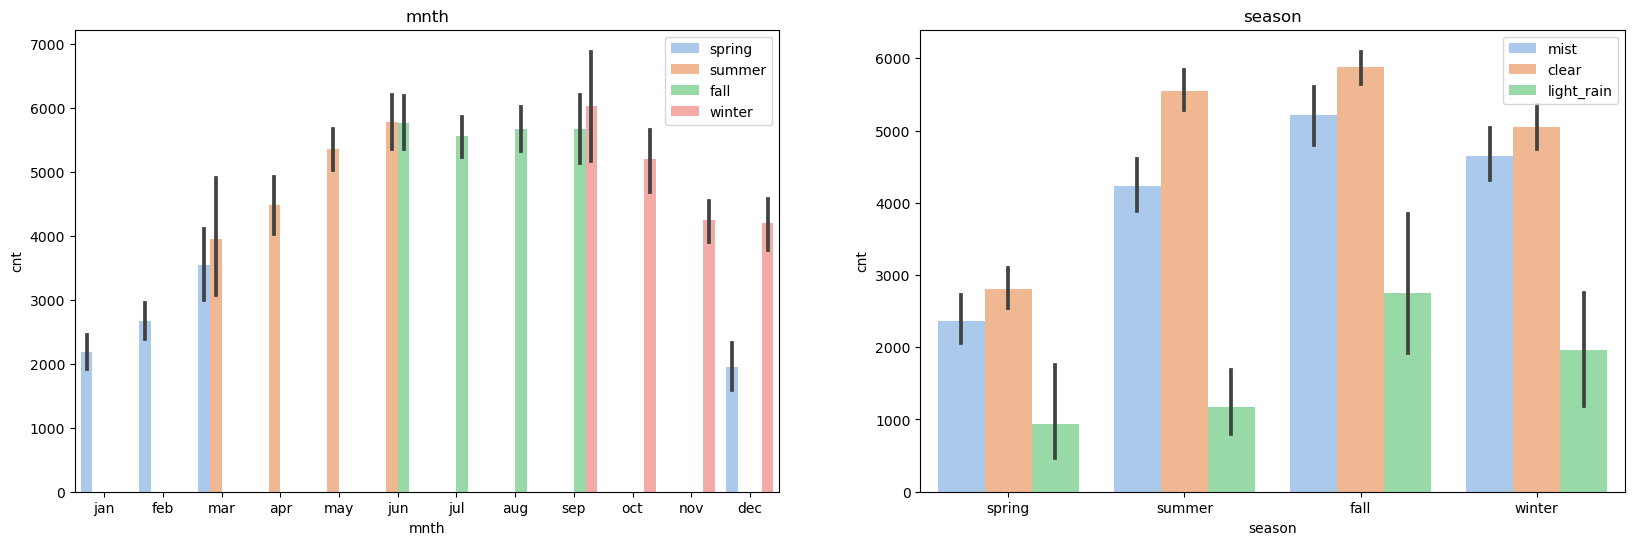

In [40]:
bi_var('mnth','season','cnt','season','weathersit',20,6)

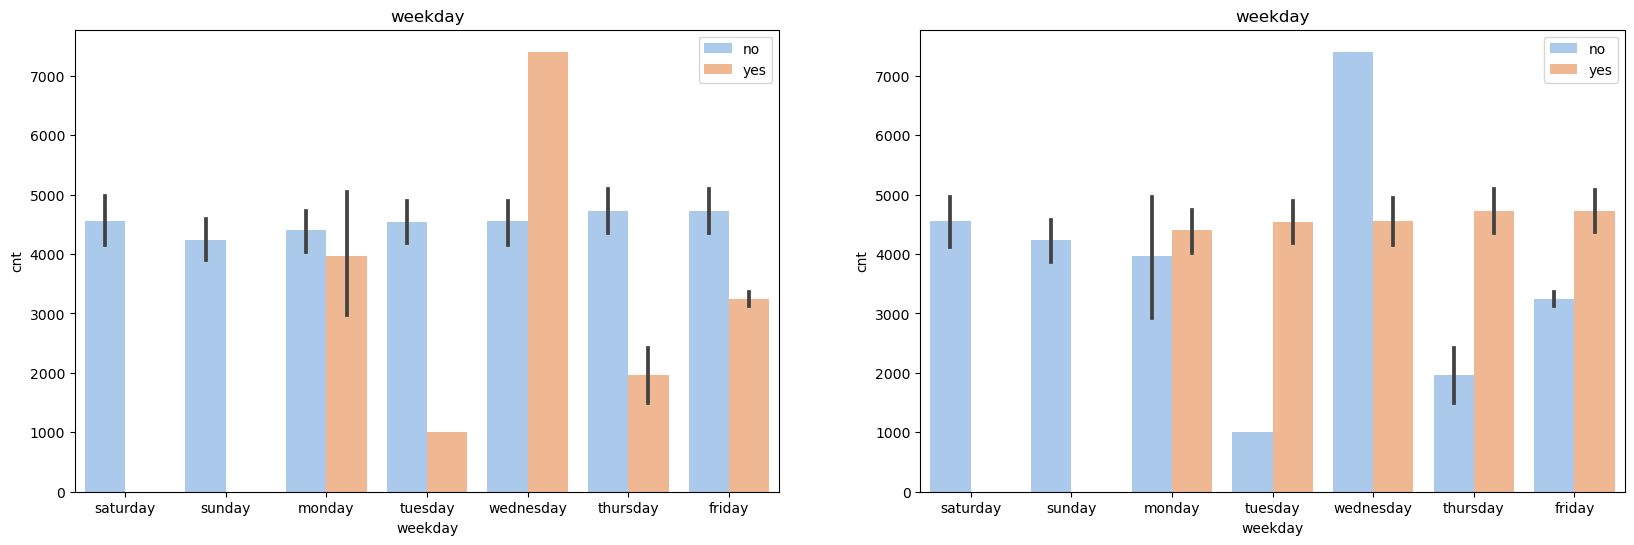

In [41]:
bi_var('weekday','weekday','cnt','holiday','workingday',20,6)

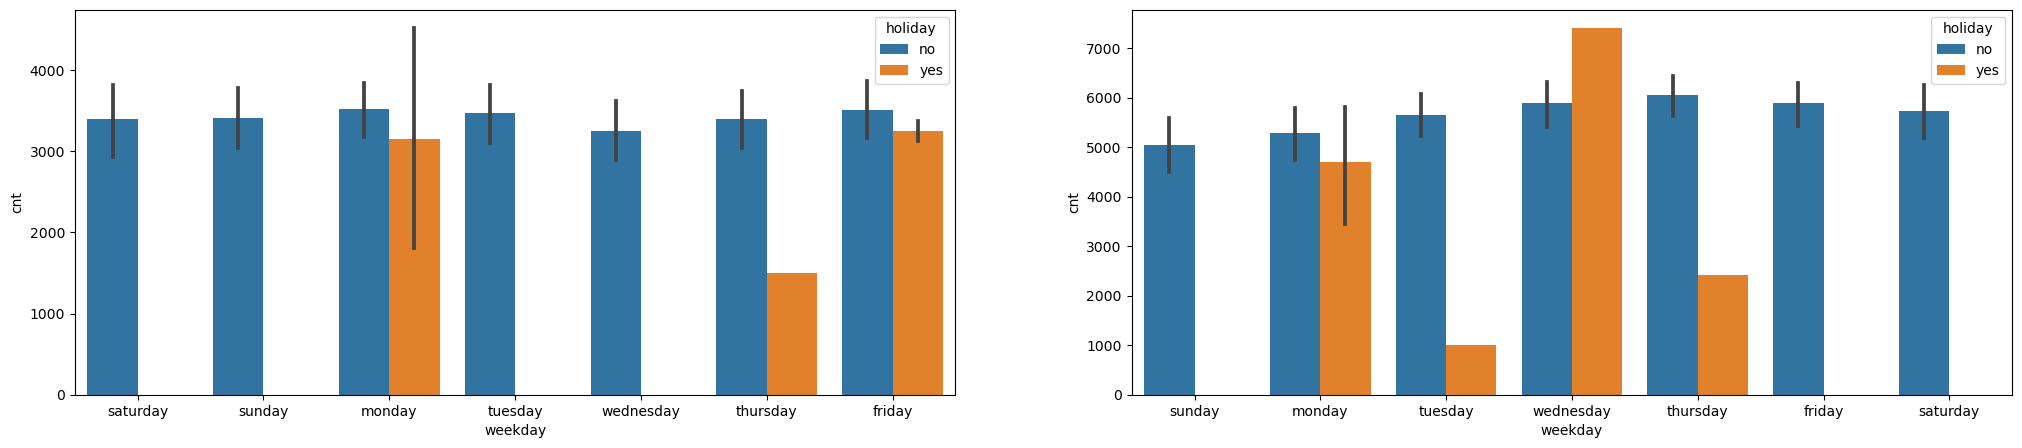

In [42]:
year1=raw2[raw2['yr']==2018]
year2=raw2[raw2['yr']==2019]
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.barplot(data=year1,x='weekday',y='cnt',hue='holiday')
plt.subplot(1,2,2)
sns.barplot(data=year2,x='weekday',y='cnt',hue='holiday')

plt.show()

#### Observation:

<div class='alert alert-block alert-success'>

- The distribution of bike bookings across seasons is similar for both 2018 and 2019, except for a noticeable increase in bookings in 2019 compared to 2018.
- September was the month with the highest bike bookings in 2019, while June had the highest bookings in 2018.
- January had relatively lower bike bookings in both years.
- Spring season, typically occurring from January to March and in December, had considerably lower bookings compared to other seasons.
- Summer season, spanning from March to June, had moderate bookings and ranked as the second highest season for bike rentals.
- Fall season consistently showed higher bookings across all years.
- The month of September, which encompasses both summer and fall seasons, experienced particularly high bike bookings. - Customers made the most bike rentals during the summer and fall seasons.
- Winter season had moderate bookings, and most of the winter bookings took place during misty and clear weather conditions.
- In terms of weather situations, bike bookings were significantly higher during clear weather. Although all seasons had lower bookings during light rain weather, the fall season stood out with higher demand compared to other seasons.

- Additionally, it was observed that bike rental demand decreases during holidays, indicating lower interest in renting bikes on such occasions. Furthermore, weekdays exhibit higher demand compared to weekends, with Wednesday being the weekday with the highest bike rental demand. Working days also show higher demand for bike rentals, suggesting that commuters or individuals with work-related purposes are the primary customers.

The occurrence of the spring season in December seems unusual considering the typical seasonal pattern, and it may require further investigation.
</div>



#### Analysis of Spring season across years:

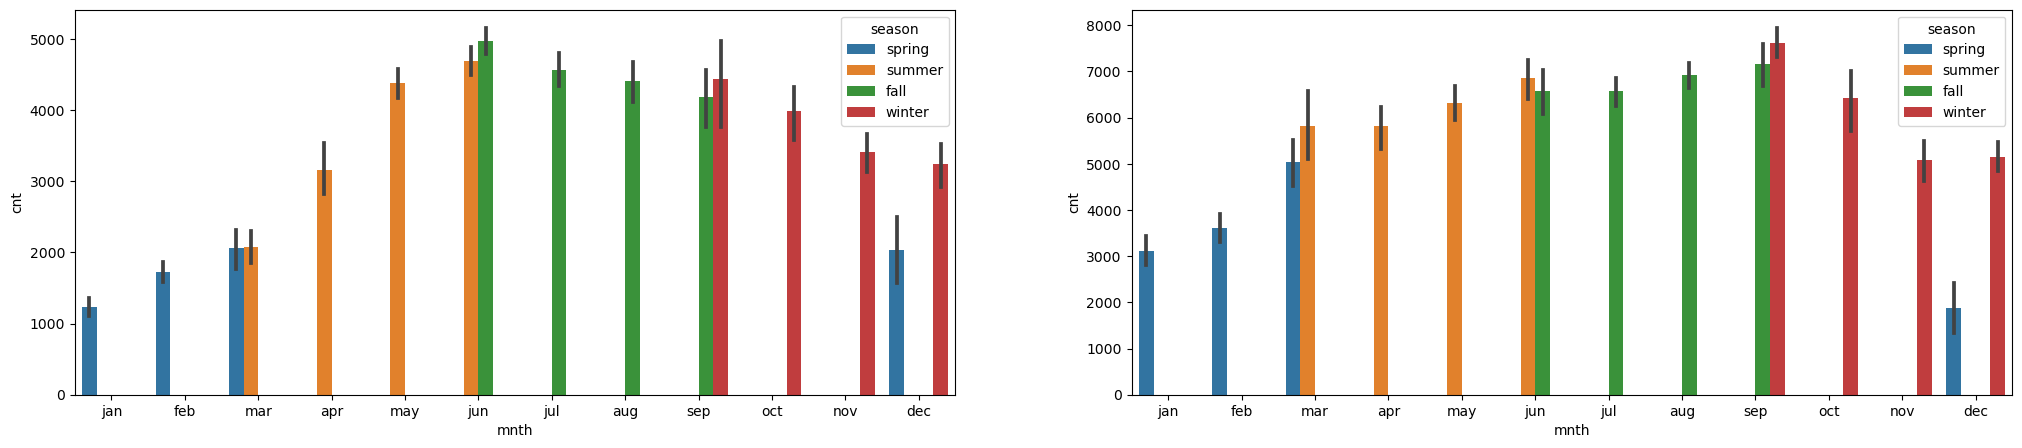

In [43]:
year1=raw2[raw2['yr']==2018]
year2=raw2[raw2['yr']==2019]
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.barplot(data=year1,x='mnth',y='cnt',hue='season')
plt.subplot(1,2,2)
sns.barplot(data=year2,x='mnth',y='cnt',hue='season')

plt.show()

#### Observation:

<div class='alert alert-block alert-success'>

Occurance of spring season during december mnth seems to be following the same pattern across years, Assuming that this could be expected.

</div>



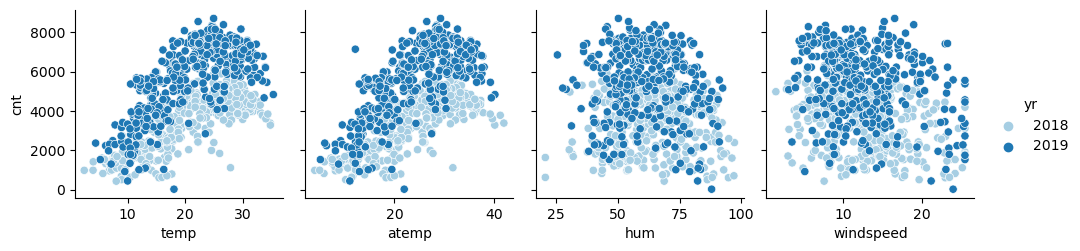

In [44]:
num_col=['temp', 'atemp', 'hum', 'windspeed']

ax = sns.pairplot(x_vars=num_col, y_vars=['cnt'] 
                  ,hue='yr', data=raw2, palette='Paired')
plt.show()

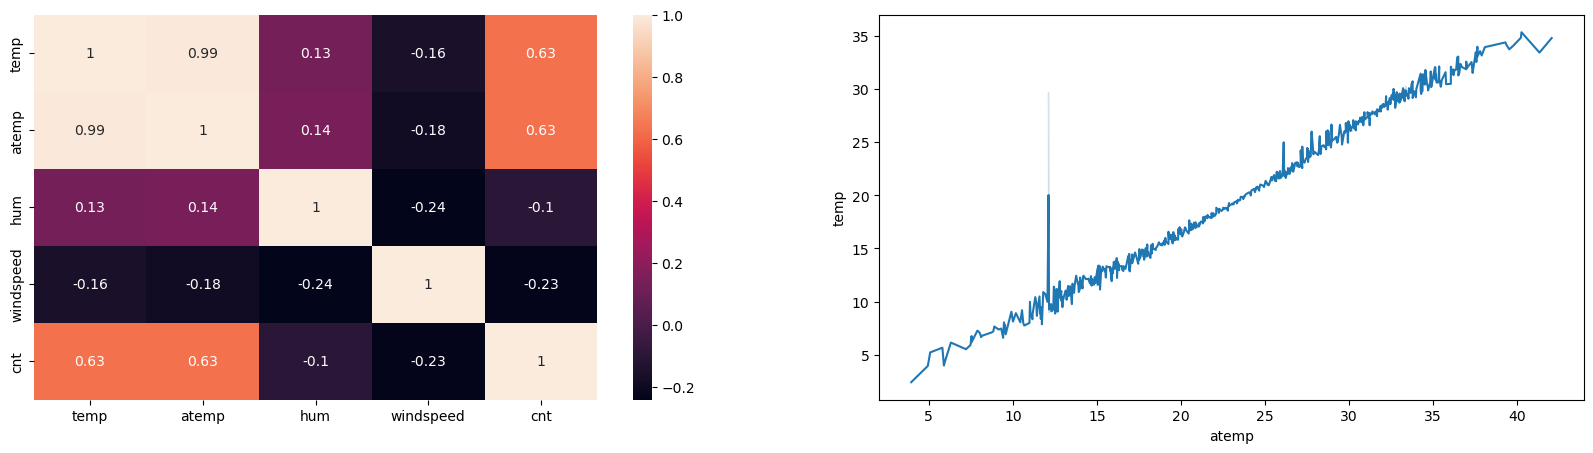

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.heatmap(raw2.corr(),annot=True)
plt.subplot(1,2,2)
sns.lineplot(x='atemp', y='temp' 
                  , data=raw2)
plt.show()
plt.show()

#### Observation:

<div class='alert alert-block alert-success'>

2019 have increased bike bookings from 2018 across temp, humidity and windspeed.
    
- Temp and Atemp has 0.63% correlation with the depedant variables.
- <b>Identified multicollinearity issue between temp and atemp</b>. temp and atemp to have high correlation (0.99) between them. This will be fixed using VIF and feature elimination before building the final model.
    
</div>



## Final Variables Selected for Model Building

In [46]:
print("""We have started our analysis with {} and finalized {} for building the model, We will pre-process
the selected fetures further for proceeding with the model building""".format(len(raw.columns),len(raw2.columns)))

We have started our analysis with 16 and finalized 12 for building the model, We will pre-process
the selected fetures further for proceeding with the model building


In [47]:
raw2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Dummy Variable Creation :

In [48]:

#Creating Dummy Variables and dropping the first variable, total dummy variable n is n-1.
bike=pd.get_dummies(raw2, drop_first=True)
print('Total number of variables after creating dummy variables is {}'.format(len(bike.columns)))

Total number of variables after creating dummy variables is 30


In [49]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   season_spring          730 non-null    uint8  
 6   season_summer          730 non-null    uint8  
 7   season_winter          730 non-null    uint8  
 8   yr_2019                730 non-null    uint8  
 9   mnth_aug               730 non-null    uint8  
 10  mnth_dec               730 non-null    uint8  
 11  mnth_feb               730 non-null    uint8  
 12  mnth_jan               730 non-null    uint8  
 13  mnth_jul               730 non-null    uint8  
 14  mnth_jun               730 non-null    uint8  
 15  mnth_m

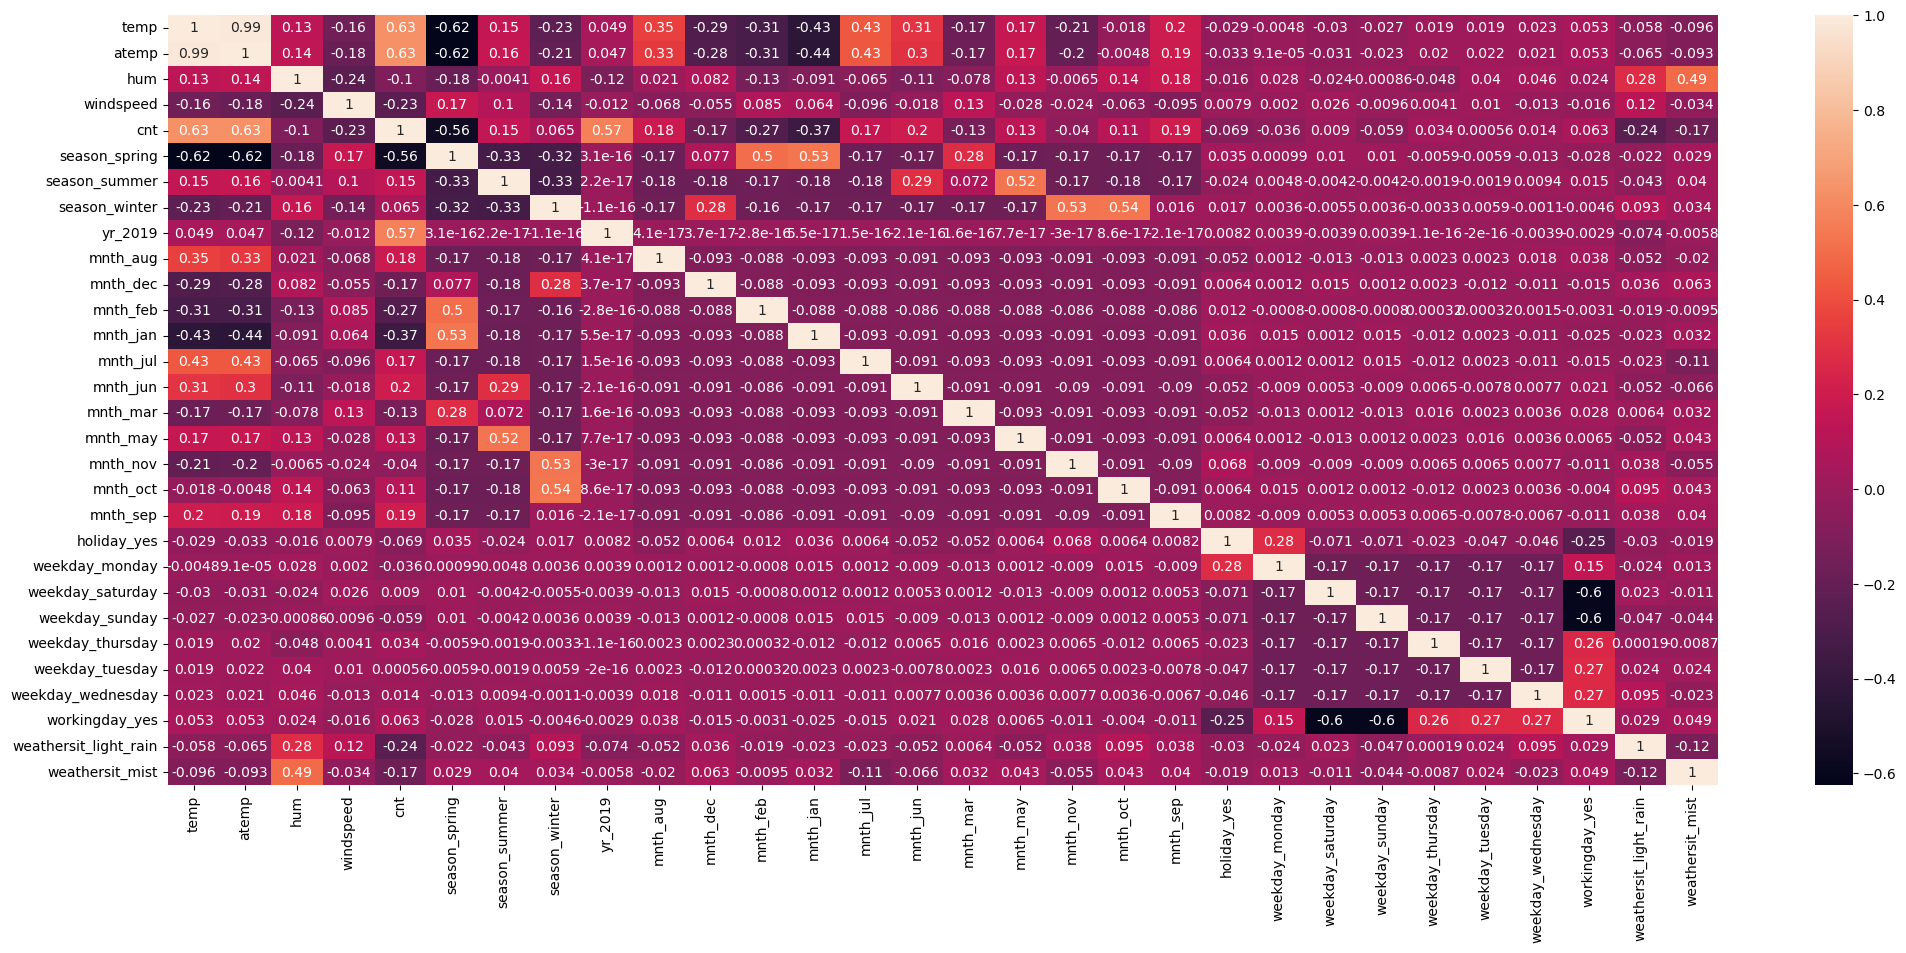

In [50]:
plt.figure(figsize=(25,10))
sns.heatmap(bike.corr(),annot=True)
plt.show()


#### Observation:

<div class='alert alert-block alert-success'>

The heatmap above illustrates the correlation between variables, which is crucial for identifying multicollinearity in the model. Here are some key observations:

- The variables "temp" and "atemp" exhibit a remarkably high correlation of 0.99, indicating a strong relationship between them.
- The variable "Workingday" demonstrates a significant negative correlation with Saturday and Sunday, suggesting that these days have a different pattern compared to working days.
- There is a negative correlation between the variable "Spring" and the target variable "cnt," implying that the bike rental count tends to be lower during the spring season.
- There is a significant positive correlation between yr 2019 and cnt implying that this variable could be a good predictor for the model.
- temparature and windspeed is positively correlated
- The variables "temp," "atemp," and "yr" show a strong positive correlation with the target variable "cnt," indicating their potential influence on bike rentals.
- Misty weather conditions and humidity are positively correlated, suggesting that higher humidity levels may contribute to misty weather.
- Different months appear to be correlated with specific weather conditions, indicating seasonal patterns in the data.
These observations provide valuable insights for understanding the relationships between variables and their potential impact on the target variable in the model.
    
</div>

# Multiple Linear Regression Model

To build an MLR model for the given problem statement we have to follow the below steps:

1. Splitting the Data in to test and training data
1. Rescaling the features
1. Divide the train dataset in to X and y (dependant and independant variables) 
1. Buidling Model on Train Dataset (using RFE and SciKit Learn)
1. Rebuilding the model by removing features one by one to get a best fit model
1. Residual Analysis on the Training Data
1. Making Predictions using Test data
1. Model Evaluation and Residual Analysis on Test Data
1. Final Conclusion


### Test and Train Split of Dataset:

Now the given sample dataset will be splitted in to test and train datasets

In [51]:
# Creating Test and Training Dataset Split
bike_train, bike_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 100)

In [52]:
print('Total Records in training Dataset :', bike_train.shape[0])
print('Total Records in test Dataset :', bike_test.shape[0])

Total Records in training Dataset : 510
Total Records in test Dataset : 219


In [53]:
bike_train.head()

temp    atemp      hum  windspeed   cnt  season_spring  \
653  19.201653  23.0423  55.8333  12.208807  7534              0   
576  29.246653  33.1448  70.4167  11.083475  7216              0   
426  16.980847  20.6746  62.1250  10.792293  4066              1   
728  10.489153  11.5850  48.3333  23.500518  1796              1   
482  15.443347  18.8752  48.9583   8.708325  4220              0   

     season_summer  season_winter  yr_2019  mnth_aug  mnth_dec  mnth_feb  \
653              0              1        1         0         0         0   
576              0              0        1         0         0         0   
426              0              0        1         0         0         0   
728              0              0        1         0         1         0   
482              1              0        1         0         0         0   

     mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
653         0         0         0         0         0         0         1   
576         0         1         0         0         0         0         0   
426         0         0         0         1         0         0         0   
728         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_sep  holiday_yes  weekday_monday  weekday_saturday  weekday_sunday  \
653         0            0               0                 0               0   
576         0            0               0                 0               0   
426         0            0               0                 1               0   
728         0            0               0                 0               1   
482         0            0               0                 1               0   

     weekday_thursday  weekday_tuesday  weekday_wednesday  workingday_yes  \
653                 0                1                  0               1   
576                 0                1                  0               1   
426                 0                0                  0               0   
728                 0                0                  0               0   
482                 0                0                  0               0   

     weathersit_light_rain  weathersit_mist  
653                      0                0  
576                      0                0  
426                      0                1  
728                      0                0  
482                      0                1

### Scaling/Transformation of the Features:

<div class='alert alert-block alert-success'>

Splitting the data into training and testing sets is done to evaluate the model's performance on unseen data. If rescaling is performed before the split, there is a risk of information leakage from the training set to the testing set. This can lead to over-optimistic performance estimates and potential model overfitting. To ensure a fair evaluation, it is recommended to perform rescaling only on the training set and apply the same scaling parameters to the testing set.
    
</div>

In [54]:
scaler = MinMaxScaler()

In [55]:
#Check Numeric values before applying scalar
bike_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].head()

temp    atemp      hum  windspeed   cnt
653  19.201653  23.0423  55.8333  12.208807  7534
576  29.246653  33.1448  70.4167  11.083475  7216
426  16.980847  20.6746  62.1250  10.792293  4066
728  10.489153  11.5850  48.3333  23.500518  1796
482  15.443347  18.8752  48.9583   8.708325  4220

In [56]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [57]:
#Check Numeric values after applying scalar
bike_train[['temp', 'atemp', 'hum', 'windspeed','cnt']].head()

temp     atemp       hum  windspeed       cnt
653  0.509887  0.501133  0.461512   0.413569  0.864243
576  0.815169  0.766351  0.652079   0.363923  0.827658
426  0.442393  0.438975  0.543728   0.351077  0.465255
728  0.245101  0.200348  0.363506   0.911723  0.204096
482  0.395666  0.391735  0.371673   0.259139  0.482973

#### Generating Statistics about all the numeric variable after Scaling the variables:

In [58]:
bike_train.describe()

temp       atemp         hum   windspeed         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.557207    0.438734    0.513620   
std      0.225844    0.212385    0.182876    0.226870    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.414959    0.273856    0.356420   
50%      0.540519    0.526811    0.560879    0.408027    0.518638   
75%      0.735215    0.688457    0.689104    0.569834    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       season_spring  season_summer  season_winter     yr_2019    mnth_aug  \
count     510.000000     510.000000      510.00000  510.000000  510.000000   
mean        0.243137       0.245098        0.24902    0.507843    0.096078   
std         0.429398       0.430568        0.43287    0.500429    0.294988   
min         0.000000       0.000000        0.00000    0.000000    0.000000   
25%         0.000000       0.000000        0.00000    0.000000    0.000000   
50%         0.000000       0.000000        0.00000    1.000000    0.000000   
75%         0.000000       0.000000        0.00000    1.000000    0.000000   
max         1.000000       1.000000        1.00000    1.000000    1.000000   

         mnth_dec    mnth_feb    mnth_jan    mnth_jul    mnth_jun    mnth_mar  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.066667    0.088235    0.076471    0.074510    0.098039   
std      0.278131    0.249689    0.283915    0.266010    0.262857    0.297660   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         mnth_may    mnth_nov    mnth_oct    mnth_sep  holiday_yes  \
count  510.000000  510.000000  510.000000  510.000000   510.000000   
mean     0.084314    0.086275    0.086275    0.080392     0.025490   
std      0.278131    0.281045    0.281045    0.272166     0.157763   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       weekday_monday  weekday_saturday  weekday_sunday  weekday_thursday  \
count      510.000000        510.000000      510.000000        510.000000   
mean         0.150980          0.154902        0.143137          0.133333   
std          0.358381          0.362166        0.350557          0.340268   
min          0.000000          0.000000        0.000000          0.000000   
25%          0.000000          0.000000        0.000000          0.000000   
50%          0.000000          0.000000        0.000000          0.000000   
75%          0.000000          0.000000        0.000000          0.000000   
max          1.000000          1.000000        1.000000          1.000000   

       weekday_tuesday  weekday_wednesday  workingday_yes  \
count       510.000000         510.000000      510.000000   
mean          0.131373           0.158824        0.676471   
std           0.338139           0.365870        0.468282   
min           0.000000           0.000000        0.000000   
25%           0.000000           0.000000        0.000000   
50%           0.000000           0.000000        1.000000   
75%           0.000000           0.000000        1.000000   
max           1.000000           1.000000        1.000000   

       weathersit_light_rain  weathersit_mist  
count             510.000000       

#### Splitting the train Data in to Y and X variable

In [59]:
#Creating Depedndent and Independent variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [60]:
len(X_train.columns)

29

In [61]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building our model on Train Dataset



#### RFE
Recursive feature elimination

<div class='alert alert-block alert-success'>
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
</div>

In [62]:
# Running RFE with the output number of the variable equal to 15
# Importing RFE and LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=14)
rfe=rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 15),
 ('mnth_sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_monday', False, 10),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', False, 9),
 ('weekday_thursday', False, 12),
 ('weekday_tuesday', False, 11),
 ('weekday_wednesday', False, 13),
 ('workingday_yes', True, 1),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

In [64]:
#Storing the select top 15 vairables in a list

col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_jul', 'mnth_sep', 'holiday_yes',
       'weekday_saturday', 'workingday_yes', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')

'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep',
       'holiday_yes', 'weekday_saturday', 'weathersit_light_rain',
       'weathersit_mist'

In [65]:
#Checking the Eliminated columns
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_monday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday'],
      dtype='object')

In [66]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [67]:
#Function to Build Manual stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def statsmodel(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
statsmodel(X_train_rfe)

Features    VIF
1                     hum  17.76
0                    temp  13.78
11         workingday_yes   5.22
2               windspeed   4.97
3           season_spring   3.49
5           season_winter   2.93
4           season_summer   2.63
13        weathersit_mist   2.41
6                 yr_2019   2.09
10       weekday_saturday   1.96
7                mnth_jul   1.59
8                mnth_sep   1.38
12  weathersit_light_rain   1.30
9             holiday_yes   1.17

#### Creating and Fititng Model:

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
#Adding constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Creating and Fitting model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#Summary of Linear regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.13e-191
Time:                        12:35:29   Log-Likelihood:                 517.21
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20


<div class='alert alert-block alert-success'>
As hum has the highest VIF value, we will remove the variable and rebuild the model with remaining variables.
</div>

In [70]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [71]:
statsmodel(X_train_new)

Features   VIF
0                    temp  6.99
10         workingday_yes  5.21
1               windspeed  4.79
2           season_spring  2.49
3           season_summer  2.33
5                 yr_2019  2.07
4           season_winter  1.99
9        weekday_saturday  1.96
6                mnth_jul  1.58
12        weathersit_mist  1.56
7                mnth_sep  1.35
8             holiday_yes  1.17
11  weathersit_light_rain  1.09

In [72]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.13e-191
Time:                        12:35:29   Log-Likelihood:                 517.21
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20


<div class='alert alert-block alert-success'>

Temp shows highest VIF value but we will keep this variable because of it's high predective power over the dependant variable.

We will remove 'Workingday_yes' which has the next highest VIF value and rebuild the model with remaining variables.


</div>

In [73]:
X_train_new = X_train_new.drop(['workingday_yes'], axis = 1)

In [74]:
statsmodel(X_train_new)

Features   VIF
0                    temp  5.15
1               windspeed  4.76
3           season_summer  2.23
2           season_spring  2.10
5                 yr_2019  2.07
4           season_winter  1.81
6                mnth_jul  1.58
11        weathersit_mist  1.55
7                mnth_sep  1.34
9        weekday_saturday  1.19
10  weathersit_light_rain  1.08
8             holiday_yes  1.05

In [75]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.28e-186
Time:                        12:35:29   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19


<div class='alert alert-block alert-success'>

Temp shows highest VIF value but we will keep this variable because of it's high predective power over the dependant variable.

We will remove 'weekday_saturday' which has the highest P value 0.088 and we will rebuild the model.


</div>

In [76]:
X_train_new = X_train_new.drop(['weekday_saturday'], axis = 1)
# Run the function to calculate VIF for the new model
statsmodel(X_train_new)

Features   VIF
0                    temp  5.12
1               windspeed  4.74
3           season_summer  2.23
2           season_spring  2.09
5                 yr_2019  2.07
4           season_winter  1.79
6                mnth_jul  1.58
10        weathersit_mist  1.55
7                mnth_sep  1.34
9   weathersit_light_rain  1.08
8             holiday_yes  1.04

In [77]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 16 May 2023   Prob (F-statistic):          3.51e-187
Time:                        12:35:29   Log-Likelihood:                 498.78
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

<div class='alert alert-block alert-success'>

Now we will remove 'mnth_jul' which has the highest P value 0.005 and we will rebuild the model.


</div>

In [78]:
X_train_new = X_train_new.drop(['mnth_jul'], axis = 1)
# Run the function to calculate VIF for the new model


In [79]:
statsmodel(X_train_new)

Features   VIF
1              windspeed  4.73
0                   temp  3.88
5                yr_2019  2.07
2          season_spring  2.00
3          season_summer  1.91
4          season_winter  1.64
9        weathersit_mist  1.54
6               mnth_sep  1.23
8  weathersit_light_rain  1.08
7            holiday_yes  1.04

In [80]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.05e-186
Time:                        12:35:29   Log-Likelihood:                 494.80
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

<div class='alert alert-block alert-success'>

Now we will remove 'season_spring'. Even though it has p value 0.007 which is statisically significant it still has high negative correlation between on of the independant variable <b>'temp'</b>, so lets remove it and we will rebuild the model.


</div>

In [81]:
X_train_new = X_train_new.drop(['season_spring'], axis = 1)
# Run the function to calculate VIF for the new model


In [82]:
statsmodel(X_train_new)

Features   VIF
0                   temp  3.70
1              windspeed  3.14
4                yr_2019  2.00
2          season_summer  1.57
8        weathersit_mist  1.48
3          season_winter  1.38
5               mnth_sep  1.20
7  weathersit_light_rain  1.08
6            holiday_yes  1.04

In [83]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.28e-186
Time:                        12:35:29   Log-Likelihood:                 491.10
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     500   BIC:                            -919.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [84]:
lr5.params

const                    0.126442
temp                     0.548443
windspeed               -0.113219
season_summer            0.087291
season_winter            0.130779
yr_2019                  0.232747
mnth_sep                 0.101185
holiday_yes             -0.098768
weathersit_light_rain   -0.283237
weathersit_mist         -0.079423
dtype: float64

#### Observation

<div class="alert alert-block alert-success">
    
-All the variables have VIF lesser than 4 and p value 0.

-This model looks good, as there seems to be VERY LOW or No Multicollinearity between the predictors and the p-values.
    
-All the Predictors seems to be significant for the model

-This model will be considered as the final model for now which is subjective to the result of test model
    
</div>    

## Model Validation:

- Hypothesis Testing 
- Linear relationship
- Multicollinearity Check
- Homoscedasticity
- Residual autocorrelation
- Normality of the residuals


#### Hypothesis Testing :

Hypothesis Testing States that

H0:B1=B2=...=Bn=0 
H1: at least one Bi!=0

In [85]:
lr5.params

const                    0.126442
temp                     0.548443
windspeed               -0.113219
season_summer            0.087291
season_winter            0.130779
yr_2019                  0.232747
mnth_sep                 0.101185
holiday_yes             -0.098768
weathersit_light_rain   -0.283237
weathersit_mist         -0.079423
dtype: float64

<div class="alert alert-block alert-success">
    
All the coefficients of lr5 model is not equal to 0 hence we can reject the null hypothisis
</div>

#### Linear Relationship Check

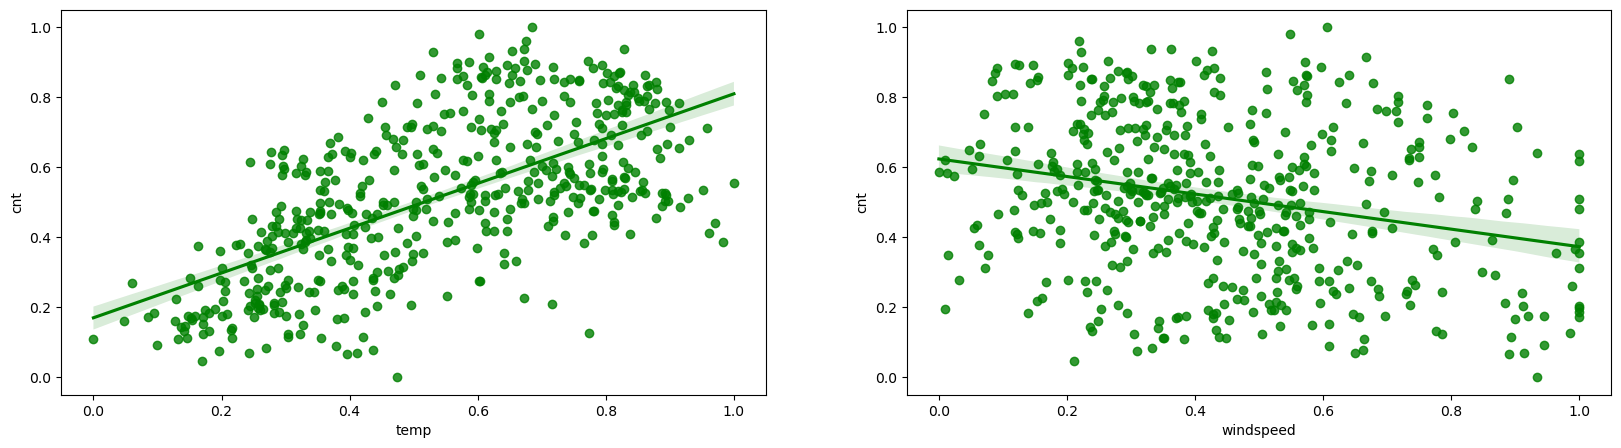

In [86]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))  # Set the width and height of the figure

plt.subplot(1, 2,1)
sns.regplot(X_train_lm5['temp'], y_train,color='green')

plt.subplot(1, 2,2)
sns.regplot(X_train_lm5['windspeed'], y_train,color='green')
plt.show()

<div class="alert alert-block alert-success">
Temp and windspeed has a linear relationship with the dependant variable 'cnt'
</div>

#### Multicolliniarity Check

Multicollinearity refers to the presence of high correlation or linear dependency among the independent variables in a regression model. It is a concern in regression analysis because it can affect the interpretation and stability of the model's coefficients.



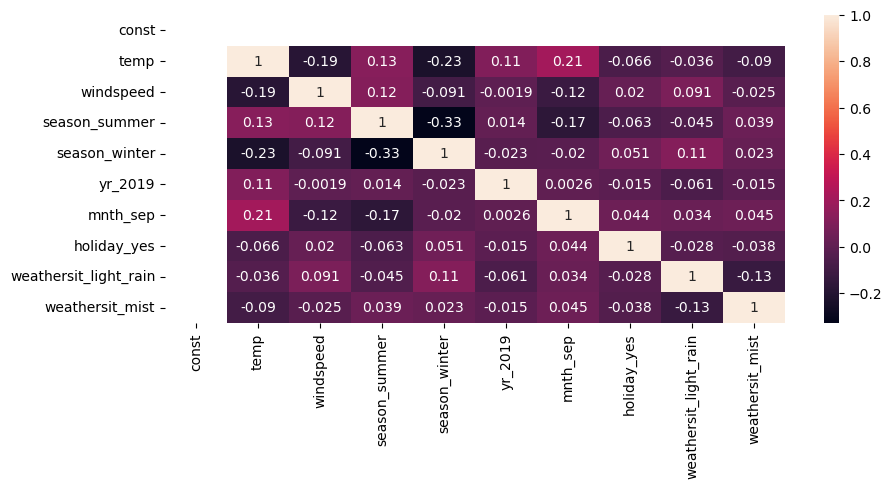

In [87]:
plt.figure(figsize=(10, 4))  
sns.heatmap(X_train_lm5.corr(),annot=True)
plt.show()

<div class="alert alert-block alert-success">
All the predictor variables seems to have weak correlation between others and all our predictor variables has VIF lesser than 4, There is no potential multicollinearity issue.
</div>

#### Checking Homoscedacity

Homoscedasticity, in the context of residual analysis, refers to the assumption that the variability of the residuals (the differences between the observed and predicted values) is constant across all levels of the independent variables. It implies that the spread or dispersion of the residuals is consistent throughout the range of predicted values.

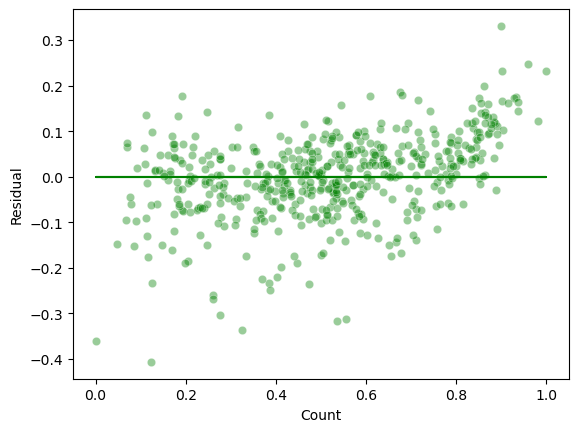

In [88]:
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual,color='green',alpha=0.4)
plt.plot(y_train,(y_train - y_train), '-g')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


<div class="alert alert-block alert-success">
Identified Homoscedasity as the differences between the observed and predicted values) is constant across all levels of the independent variables.
</div>

#### Residual Auto Correlation

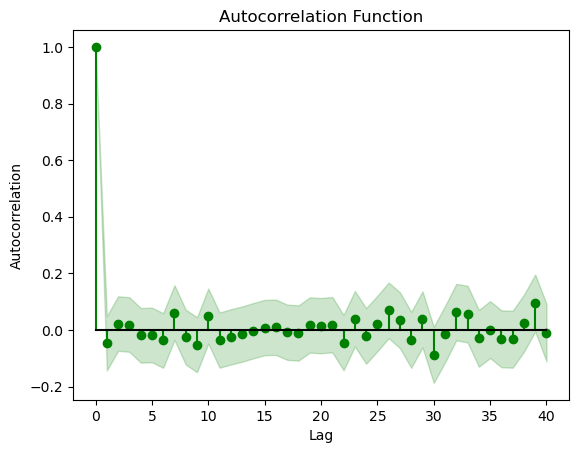

In [89]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
residuals = lr5.resid
# Assuming you have a series of data called 'data'
acf, confint = sm.tsa.stattools.acf(residuals, nlags=40, alpha=0.03)

markers, _, _ = plt.stem(acf, markerfmt='go', linefmt='g-', basefmt='k-')

# Modify the color of the markers to green
markers.set_markerfacecolor('green')
markers.set_markeredgecolor('green')
# Customize the color of the variance area
plt.fill_between(range(len(acf)), confint[:, 0], confint[:, 1], color='green', alpha=0.2)

# Set plot labels and title
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')


plt.show()


<div class="alert alert-block alert-success">
There is no Auto correlation identified, Since the error terms are indepednet and don't follows any pattern.
</div>

#### Residual Analysis of the train data
Checking the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

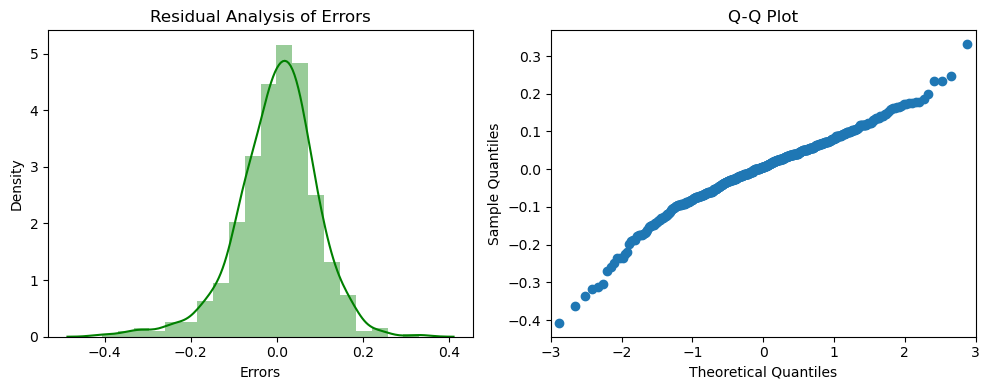

In [90]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Distribution plot
sns.distplot(res, bins=20, color='green', ax=axes[0])
axes[0].set_title('Residual Analysis of Errors')
axes[0].set_xlabel('Errors')

# Q-Q plot
sm.qqplot(residuals, color='green', ax=axes[1])
axes[1].set_title('Q-Q Plot')


# Adjust spacing between subplots
plt.tight_layout()


plt.show()



<div class="alert alert-block alert-success">
Error terms were normally distributed with a mean 0 which is good.
</div>

## Conclusion :
<div class="alert alert-block alert-success">

Model lr5 looks fine Since it passes all the linear regression assumptions

- low p-value
- low VIF 
- R-squared and Adj. R-squared very close indicating none of parameters in this model are redundant

</div>    

## Making Predictions

1. Apply Scaling/Transformation on test dataset
1. Select the varaibles from final train model
1. Build the test model
1. Residual Analysis on Test Model

#### Scaling the test variables

In [91]:
num = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num] = scaler.transform(bike_test[num])



In [92]:
bike_test.head()

temp     atemp       hum  windspeed       cnt  season_spring  \
184  0.831783  0.769660  0.565508   0.115794  0.692706              0   
535  0.901354  0.842587  0.505614   0.211364  0.712034              0   
299  0.511964  0.496145  0.794188   0.459509  0.303382              0   
221  0.881625  0.795343  0.286191   0.466884  0.547400              0   
152  0.817246  0.741471  0.130470   0.738905  0.569029              0   

     season_summer  season_winter  yr_2019  mnth_aug  mnth_dec  mnth_feb  \
184              0              0        0         0         0         0   
535              1              0        1         0         0         0   
299              0              1        0         0         0         0   
221              0              0        0         1         0         0   
152              1              0        0         0         0         0   

     mnth_jan  mnth_jul  mnth_jun  mnth_mar  mnth_may  mnth_nov  mnth_oct  \
184         0         1         0         0         0         0         0   
535         0         0         1         0         0         0         0   
299         0         0         0         0         0         0         1   
221         0         0         0         0         0         0         0   
152         0         0         1         0         0         0         0   

     mnth_sep  holiday_yes  weekday_monday  weekday_saturday  weekday_sunday  \
184         0            1               1                 0               0   
535         0            0               0                 0               0   
299         0            0               0                 0               0   
221         0            0               0                 0               0   
152         0            0               0                 0               0   

     weekday_thursday  weekday_tuesday  weekday_wednesday  workingday_yes  \
184                 0                0                  0               0   
535                 0                0                  1               1   
299                 1                0                  0               1   
221                 0                0                  1               1   
152                 1                0                  0               1   

     weathersit_light_rain  weathersit_mist  
184                      0                1  
535                      0                0  
299                      0                1  
221                      0                0  
152                      0                0

In [93]:
#splitting dependent and independant variables
y_test = bike_test.pop('cnt')
X_test = bike_test

#### Select the varaibles from final train model

In [94]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)

X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   temp                   219 non-null    float64
 2   windspeed              219 non-null    float64
 3   season_summer          219 non-null    uint8  
 4   season_winter          219 non-null    uint8  
 5   yr_2019                219 non-null    uint8  
 6   mnth_sep               219 non-null    uint8  
 7   holiday_yes            219 non-null    uint8  
 8   weathersit_light_rain  219 non-null    uint8  
 9   weathersit_mist        219 non-null    uint8  
dtypes: float64(3), uint8(7)
memory usage: 8.3 KB


#### Making predictions using the final model (lr5)

In [95]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

Text(0, 0.5, 'y_pred')

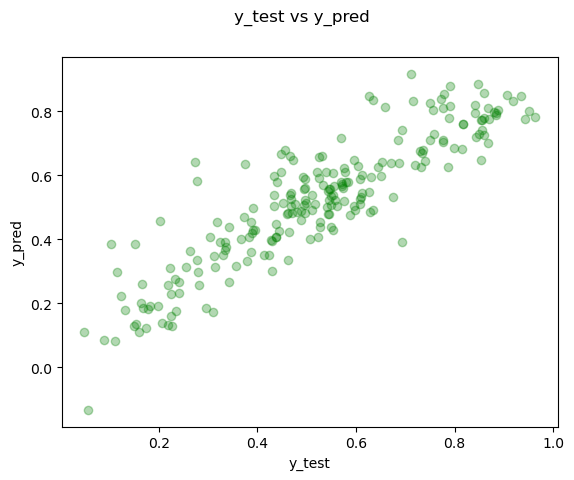

In [96]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,color='green',alpha = 0.3)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 


<div class="alert alert-block alert-success">

Model shows a linear relationship between the dependant and independant variables.
</div>    

### Residual Analysis and Evaluation

#### R^2 and Adjusted R^2 Calculation for test data

In [97]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
#n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print('R^2 of test model: {}'.format(r2))
print('Adjusted R^2 of test model: {}'.format(adjusted_r2))

R^2 of test model: 0.7938
Adjusted R^2 of test model: 0.7849


#### Calculating Mean Squared Error

In [98]:
n = len(y_test)
mse = np.mean((y_test - y_pred) ** 2)
print('Mean_Squared_Error :' ,mse)

Mean_Squared_Error : 0.009793714737159377



<div class="alert alert-block alert-success">

- The mean square error of the final model is 0.97% states that the model is not able to match 0.98% of values only.
- The r square value is 79% which means our model is able to explain 79% of the variance.
    
 
</div>

#### Evaluation of Predicted Model

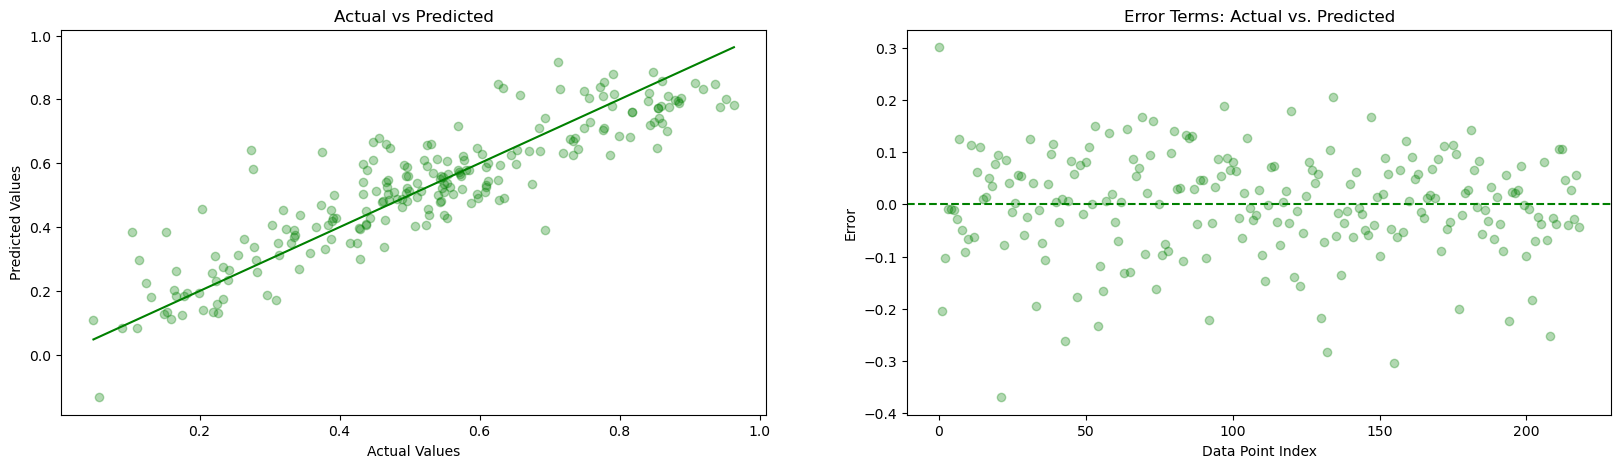

In [99]:
actual_values = y_test
predicted_values = y_pred
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
# Create a scatter plot
plt.scatter(actual_values, predicted_values,color='green',alpha=0.3)

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
# Add a diagonal line for reference
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='green')


# Calculate the error terms
errors = y_test - y_pred

plt.subplot(1,2,2)
# Create a scatter plot of the error terms
plt.scatter(range(len(errors)), errors,color='green',alpha=0.3)
# Add a horizontal line at y = 0
plt.axhline(y=0, color='green', linestyle='--')

# Customize the plot
plt.xlabel('Data Point Index')
plt.ylabel('Error')
plt.title('Error Terms: Actual vs. Predicted')


# Show the plot
plt.show()


<div class="alert alert-block alert-success">

From the above scatterplot we can find a linear relationship between actual and predicted values  
 
</div>



- The mean of the error terms is close to zero
- The error terms has constant variance across all levels of the predicted values.(No Patterns in spread identified)
- There are no existence of correlation or autocorrelation.



<div class="alert alert-block alert-success">

Since we a have good MLR model we can proceed with building our linear equation and coefficients
</div>

In [100]:
lr5.params

const                    0.126442
temp                     0.548443
windspeed               -0.113219
season_summer            0.087291
season_winter            0.130779
yr_2019                  0.232747
mnth_sep                 0.101185
holiday_yes             -0.098768
weathersit_light_rain   -0.283237
weathersit_mist         -0.079423
dtype: float64

#### Regression Equation based on lr5:

<div class="alert alert-block alert-success">

cnt=0.126442+(temp x 0.548443)-(windspeed x 0.113219)+(season_summer x 0.087291)+(season_winter x 0.130779)+(yr_2019 x 0.232747) +(mnth_sep x 0.101185)-(holiday_yes x 0.098768)-(weathersit_light_rain x 0.283237)-(weathersit_mist x 0.079423)

</div>


#### Interpretation of Coefficients :

<div class="alert alert-block alert-success">

- const : The Constant value of ‘0.126442’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.126442 units
- temp : A coefficient value of ‘0.548443’ indicated that a unit increase in temp variable, increases the bookings by 0.548443 units
- windspeed : A coefficient value of ‘-0.113219’ indicated that a unit increase in windspeed variable, decreases the bookings by 0.113219 units
- season_summer : A coefficient value of ‘0.087291’ indicated that a unit increase in season_summer variable, increases the bookings by 0.087291 units
- season_winter : A coefficient value of ‘0.130779’ indicated that a unit increase in season_winter variable, increases the bookings by 0.130779 units
- yr_2019 : A coefficient value of ‘0.232747’ indicated that a unit increase in yr_2019 variable, increases the bookings by 0.232747 units
- mnth_sep : A coefficient value of ‘0.101185’ indicated that a unit increase in mnth_sep variable, increases the bookings by 0.101185 units
- holiday_yes : A coefficient value of ‘-0.098768’ indicated that a unit increase in holiday_yes variable, decreases the bookings by 0.098768 units
- weathersit_light_rain : A coefficient value of ‘-0.283237’ indicated that a unit increase in weathersit_light_rain variable, decreases the bookings by 0.283237 units
- weathersit_mist : A coefficient value of ‘-0.079423’ indicated that a unit increase in weathersit_mist variable, decreases the bookings by 0.079423 units
</div>

## Insights

<div class="alert alert-block alert-success">
    
- temp: Temperature has a significant impact on bike bookings, with an increase in temperature leading to a higher demand for rentals. This suggests that people are more inclined to rent bikes during warmer weather.

- weathersit: Certain weather conditions, such as mist with cloudy, mist with broken clouds, mist with few clouds, mist, light snow, light rain with thunderstorm and scattered clouds, and light rain with scattered clouds, may have a negative effect on bike bookings. These weather situations might deter people from renting bikes, potentially due to safety concerns or discomfort.

- windspeed: The speed of the wind is another factor that influences bike rental demand. An increase in windspeed is associated with a decrease in bookings, indicating that people may be less willing to ride bikes in windy conditions.

- seasons: Summer and winter seasons stand out as the periods with higher demand for rental bikes. This could be due to favorable weather conditions, vacation time, or seasonal activities that attract more people to outdoor biking.

- holidays: Bike rental demand tends to be lower during holidays. This could be because people have different activities and commitments during holidays, reducing their interest in renting bikes.

- Month of September (mnth_sep): September appears to be a month with a higher likelihood of increased bike rental demand. It could be influenced by factors such as pleasant weather, school holidays, or special events taking place during that month.

- Year (yr): The analysis shows a consistent increase in bike bookings each year. This indicates a growing popularity of bike rentals over time, possibly due to factors such as increased awareness, convenience, and changing transportation preferences.

Overall, the insights suggest that temperature, weather conditions, windspeed, seasons, holidays, specific months, and the year have a notable impact on bike rental demand. Businesses can utilize this information to optimize their operations, marketing strategies, and resource allocation to cater to the varying demand patterns throughout different seasons, weather conditions, and times of the year.
</div>

## Insights and Recommendations:


<div class="alert alert-block alert-success">

- Temperature and Weather: The analysis reveals a strong positive correlation between high temperature, good weather, and bike rentals. To leverage this relationship, it is recommended to focus on increasing bike availability and promotional activities during the summer months when the weather is favorable. By doing so, you can attract more customers who are likely to be interested in renting bikes for outdoor activities.

- Holidays: The findings suggest that bike rental demand decreases during holidays. To mitigate this, it is advisable to launch attractive offers and promotions targeting weekdays, especially during holiday periods. By providing incentives for customers to rent bikes on non-holiday weekdays, you can help maintain a steady flow of bookings and offset the potential decline in demand during holidays.

- Seasonal Demand: The analysis indicates that bike rentals have higher demand during the summer and winter seasons. This presents an opportunity to focus marketing efforts and resource allocation during these periods. For example, you can design special packages or events that cater to the seasonal preferences of customers. By aligning your offerings with the peak demand seasons, you can maximize the utilization of your bike fleet and increase overall rental bookings.

- Clear Weather and Working Days: The study highlights that bike rentals have better demand during clear weather and on working days/weekdays. It is important to leverage this information by ensuring accurate weather forecasts are considered in your marketing campaigns and by offering special incentives for customers who choose to rent bikes on working days. This can help attract more customers during periods of clear weather and increase bike rental bookings.

In summary, to optimize bike rental bookings, it is recommended to focus on enhancing bike availability and promotional activities during the summer months, targeting weekdays for increased bookings during holidays, and aligning marketing efforts with periods of clear weather and working days. By capitalizing on these insights, you can attract more customers, increase rental demand, and maximize your business's revenue potential.

</div>

# Thank You